## Retrieving firms and creating firm list

#### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.ticker as mtick
import matplotlib.dates as mpl_dates

import warnings
warnings.filterwarnings("ignore")

### Loading List of Firms by Industry

In [6]:
metal = pd.read_csv("InputData/Metal.csv")
metal = metal.iloc[:17]
metal = metal[["Company", "Ticker"]]
metal_firm = metal["Ticker"].tolist()

energy = pd.read_csv("InputData/Energy.csv")
energy = energy[["HOLDINGS", "TICKER"]]
energy_firm = energy["TICKER"].tolist()

semi = pd.read_csv("InputData/Microchips.csv")
semi = semi.iloc[:38]
semi = semi[["Name", "Ticker"]]
semi_firm = semi["Ticker"].tolist()

trans = pd.read_csv("InputData/Transport.csv")
trans = trans.iloc[:47]
trans = trans[["Name", "Ticker"]]
trans_firm = trans["Ticker"].tolist()

food = pd.read_csv("InputData/Food.csv")
food = food[["SecurityName", "Identifier"]]
food_firm = food["Identifier"].tolist()

## Downloading stock prices for selected firms

In [7]:
start_date = datetime(2022, 2, 1)
end_date = datetime(2023, 4, 10)


metal_stocks = yf.download(metal_firm, start=start_date, end=end_date)
energy_stocks = yf.download(energy_firm,start=start_date,end=end_date)
semi_stocks = yf.download(semi_firm,start=start_date,end=end_date)
trans_stocks = yf.download(trans_firm,start=start_date,end=end_date)
food_stocks = yf.download(food_firm,start=start_date,end=end_date)

[*********************100%***********************]  17 of 17 completed
[*********************100%***********************]  112 of 112 completed
[*********************100%***********************]  38 of 38 completed
[*********************100%***********************]  47 of 47 completed
[*********************100%***********************]  30 of 30 completed


## Cleaning stock data converting to table

In [8]:
metal_prices = metal_stocks.filter(like='Adj Close')               
metal_prices.columns = metal_prices.columns.get_level_values(1)    
metal_prices =  metal_prices.stack().swaplevel().sort_index().reset_index()
metal_prices.columns = ['Firm','Date','Adj Close']

In [9]:
energy_prices = energy_stocks.filter(like='Adj Close')               
energy_prices.columns = energy_prices.columns.get_level_values(1)    
energy_prices =  energy_prices.stack().swaplevel().sort_index().reset_index()
energy_prices.columns = ['Firm','Date','Adj Close']

In [10]:
semi_prices = semi_stocks.filter(like='Adj Close')               
semi_prices.columns = semi_prices.columns.get_level_values(1)    
semi_prices =  semi_prices.stack().swaplevel().sort_index().reset_index()
semi_prices.columns = ['Firm','Date','Adj Close']

In [11]:
trans_prices = trans_stocks.filter(like='Adj Close')               
trans_prices.columns = trans_prices.columns.get_level_values(1)    
trans_prices =  trans_prices.stack().swaplevel().sort_index().reset_index()
trans_prices.columns = ['Firm','Date','Adj Close']

In [12]:
food_prices = food_stocks.filter(like='Adj Close')               
food_prices.columns = food_prices.columns.get_level_values(1)    
food_prices =  food_prices.stack().swaplevel().sort_index().reset_index()
food_prices.columns = ['Firm','Date','Adj Close']

## Calculating daily returns

In [13]:
metal_prices = metal_prices.sort_values(['Firm', 'Date'])
metal_prices['Daily Returns'] = metal_prices.groupby('Firm')['Adj Close'].pct_change()

In [14]:
energy_prices = energy_prices.sort_values(['Firm', 'Date'])
energy_prices['Daily Returns'] = energy_prices.groupby('Firm')['Adj Close'].pct_change()

In [15]:
semi_prices = semi_prices.sort_values(['Firm', 'Date'])
semi_prices['Daily Returns'] = semi_prices.groupby('Firm')['Adj Close'].pct_change()

In [16]:
trans_prices = trans_prices.sort_values(['Firm', 'Date'])
trans_prices['Daily Returns'] = trans_prices.groupby('Firm')['Adj Close'].pct_change()

In [17]:
food_prices = food_prices.sort_values(['Firm', 'Date'])
food_prices['Daily Returns'] = food_prices.groupby('Firm')['Adj Close'].pct_change()

## Downloading SP500 Returns - Market Returns

In [18]:
spy = yf.download('^GSPC', start=start_date, end=end_date)
market_ret = spy.filter(like='Adj Close')               
market_ret = market_ret.stack().swaplevel().sort_index().reset_index()
market_ret.columns = ['Firm','Date','Adj Close']
market_ret['Firm'] = "sp500"
market_ret['Daily Returns'] = market_ret['Adj Close'].pct_change()
market_ret.head(5)

[*********************100%***********************]  1 of 1 completed


Firm       Date    Adj Close  Daily Returns
0  sp500 2022-02-01  4546.540039            NaN
1  sp500 2022-02-02  4589.379883       0.009423
2  sp500 2022-02-03  4477.439941      -0.024391
3  sp500 2022-02-04  4500.529785       0.005157
4  sp500 2022-02-07  4483.870117      -0.003702

## Loading Data of Major Events in the War

In [19]:
event_dates = pd.read_csv("InputData/MajorEvents.csv")
event_dates['Date'] = pd.to_datetime(event_dates['Date'])
event_dates

Date                                           Event
0  2022-02-24                           Invasion Announcement
1  2022-02-25  Ukraine announces it will defend its territory
2  2022-03-02                        Refugee Crisis in Poland
3  2022-03-06                         Irpin Bridge Evacuation
4  2022-03-09                        Mariupol Hospital Attack
5  2022-03-16                        Mariupol Theater Bombing
6  2022-04-01                            War crimes uncovered
7  2022-04-14                    Sunking of Russian main ship
8  2022-05-17                    Mariupol Steel Plant Defence
9  2022-09-01                    Russian retreat from Kharkiv
10 2022-09-21                      Russia starts mobilization
11 2022-10-08                            Crimea Bridge Attack
12 2022-10-10                                   Kyiv Blackout
13 2022-11-12                         Kherson city liberation
14 2022-12-21                     Zelensky visits White House
15 2023-01-25                             Germany sends tanks
16 2023-02-20                               Biden visits Kyiv

## Calculation of excess returns for each firms in the industries

In [20]:
metal_excess_returns = metal_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
metal_excess_returns = metal_excess_returns.reset_index()
metal_excess_returns = metal_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
metal_excess_returns["Industry"] = "Metal"

In [21]:
energy_excess_returns = energy_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
energy_excess_returns = energy_excess_returns.reset_index()
energy_excess_returns = energy_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
energy_excess_returns["Industry"] = "Energy"

In [22]:
semi_excess_returns = semi_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
semi_excess_returns = semi_excess_returns.reset_index()
semi_excess_returns = semi_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
semi_excess_returns["Industry"] = "Semiconductor"

In [23]:
trans_excess_returns = trans_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
trans_excess_returns = trans_excess_returns.reset_index()
trans_excess_returns = trans_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
trans_excess_returns["Industry"] = "Transport"

In [24]:
food_excess_returns = food_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
food_excess_returns = food_excess_returns.reset_index()
food_excess_returns = food_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
food_excess_returns["Industry"] = "Food"
food_excess_returns.head(5)

Firm       Date  Excess Returns Industry
0  ADM 2022-02-01             NaN     Food
1  ADM 2022-02-02        0.005936     Food
2  ADM 2022-02-03        0.011091     Food
3  ADM 2022-02-04       -0.004628     Food
4  ADM 2022-02-07        0.012598     Food

## Concatenating all industry datasets

In [25]:
# Concatenate dataframes vertically
big_df = pd.concat([food_excess_returns, trans_excess_returns, semi_excess_returns, energy_excess_returns, metal_excess_returns])
big_df = big_df.reset_index(drop=True)

## Calculating cumulative returns around event dates for every industry 

In [26]:
event_ret_df = pd.DataFrame()
industries = ['Food', 'Transport', 'Semiconductor', 'Energy', 'Metal']
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']
    # Define the start and end dates for the subset
    start_date = pd.to_datetime(date) - pd.Timedelta(days=20)
    end_date = pd.to_datetime(date) + pd.Timedelta(days=20)

    for industry in industries:
        sub_df = big_df.query("Date >= @start_date and Date <= @end_date and Industry == @industry")
        sub_df_cum = sub_df.assign(R=1+sub_df['Excess Returns']).assign(cumret=lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')
        sub_df_cum["Event"] = event
        sub_df_cum["EventDate"] = date
        sub_df_cum["Industry"] = industry
        event_ret_df = pd.concat([event_ret_df, sub_df_cum])

event_ret_df["Cum_ret"] = event_ret_df["Cum_ret"] - 1
event_ret_df["EventDate"] = pd.to_datetime(event_ret_df["EventDate"])
event_ret_df["Date"] = pd.to_datetime(event_ret_df["Date"])
event_ret_df.to_csv("OutputData/final.csv")
event_ret_df.head(5)

Date   Cum_ret                  Event  EventDate Industry
0 2022-02-04 -0.019062  Invasion Announcement 2022-02-24     Food
1 2022-02-07 -0.003971  Invasion Announcement 2022-02-24     Food
2 2022-02-08 -0.002236  Invasion Announcement 2022-02-24     Food
3 2022-02-09 -0.013325  Invasion Announcement 2022-02-24     Food
4 2022-02-10 -0.006935  Invasion Announcement 2022-02-24     Food

## Plotting industry cumulative returns for all events (all industries)

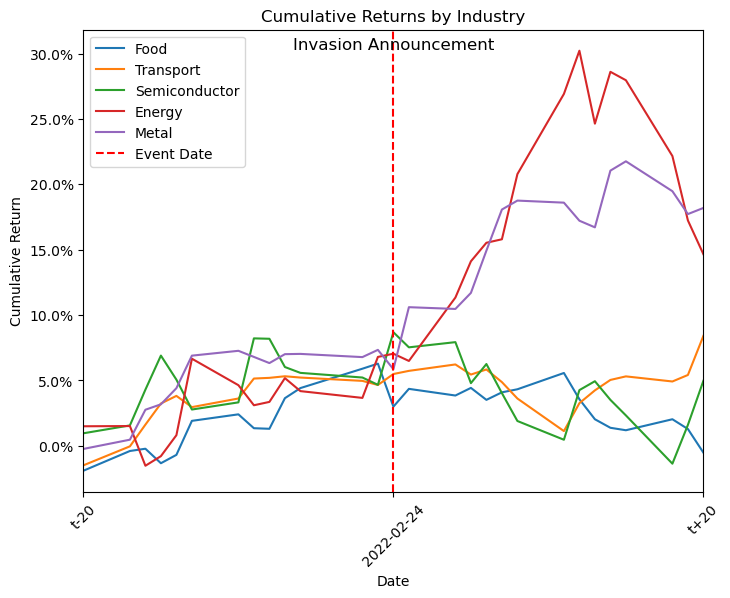

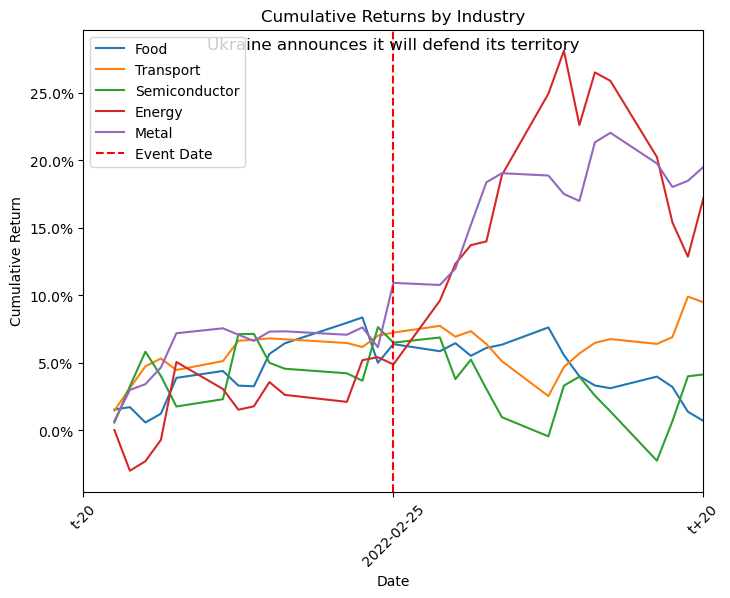

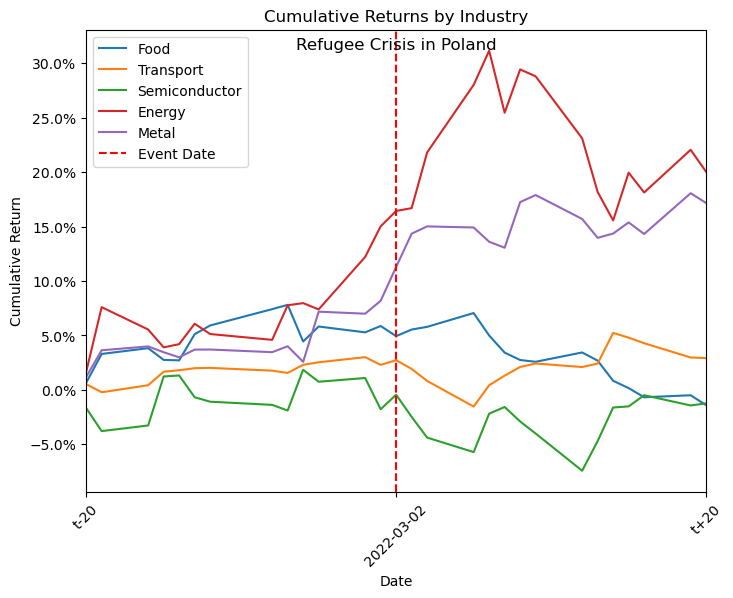

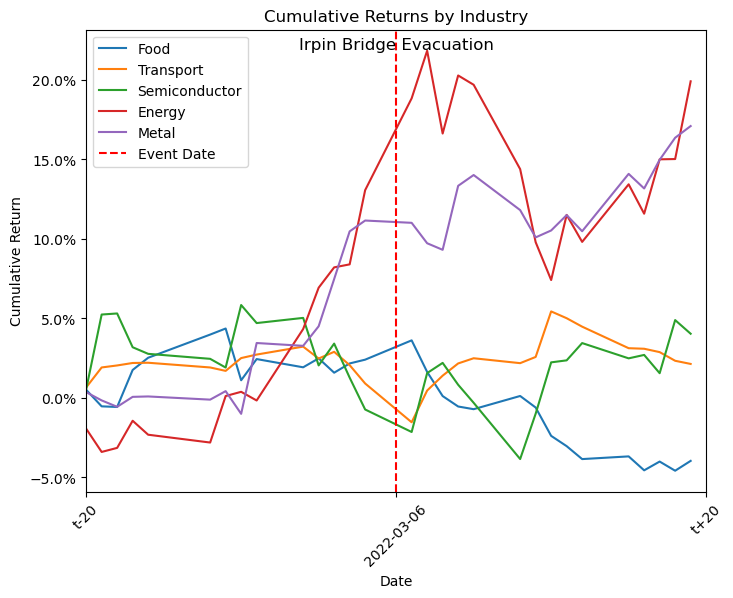

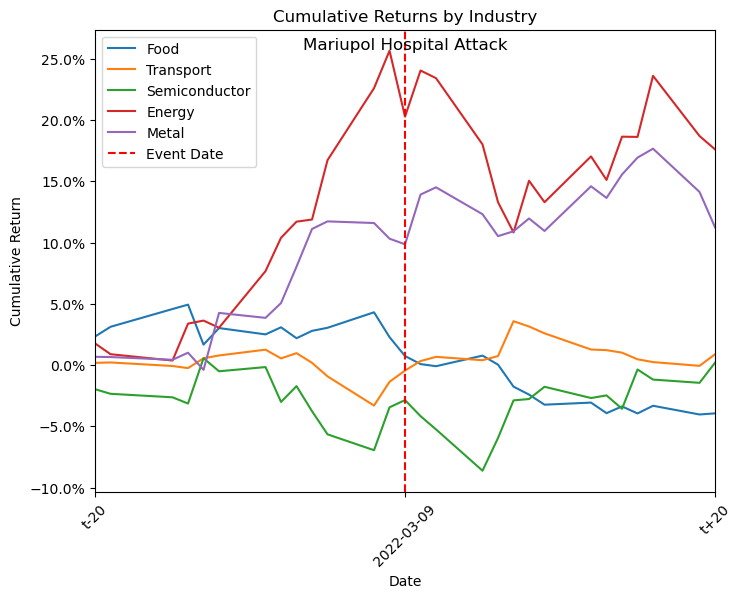

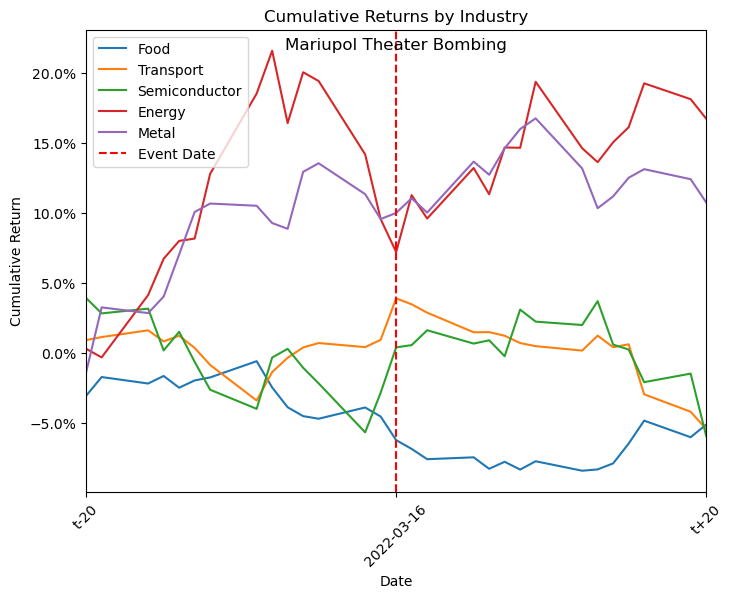

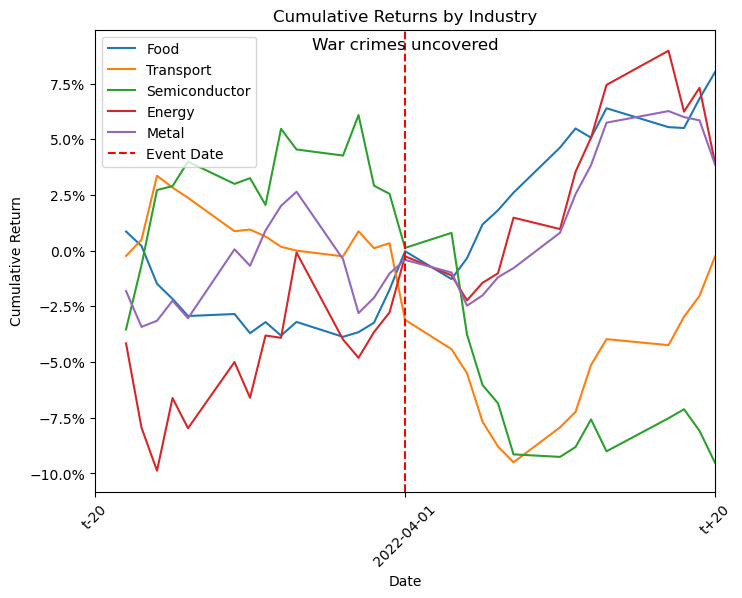

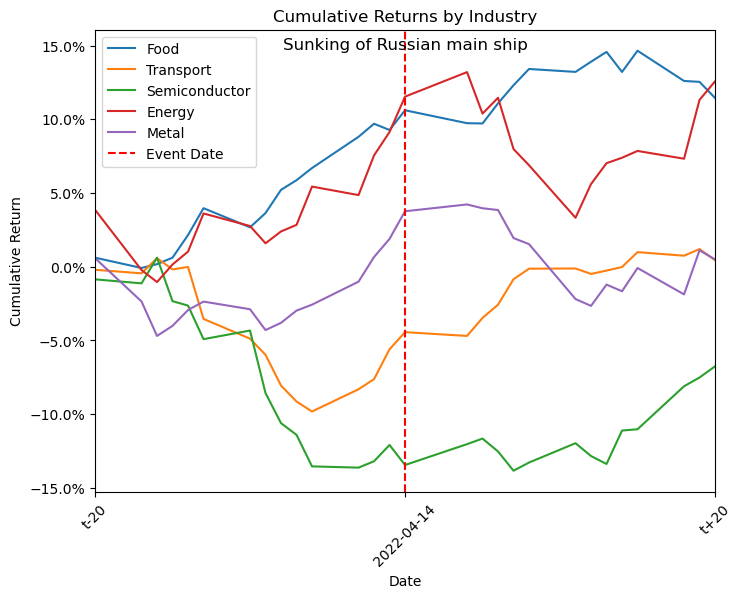

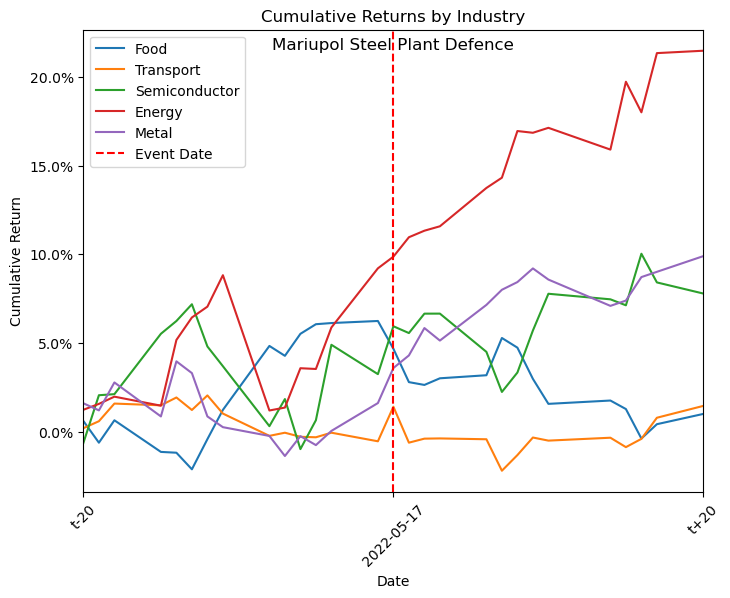

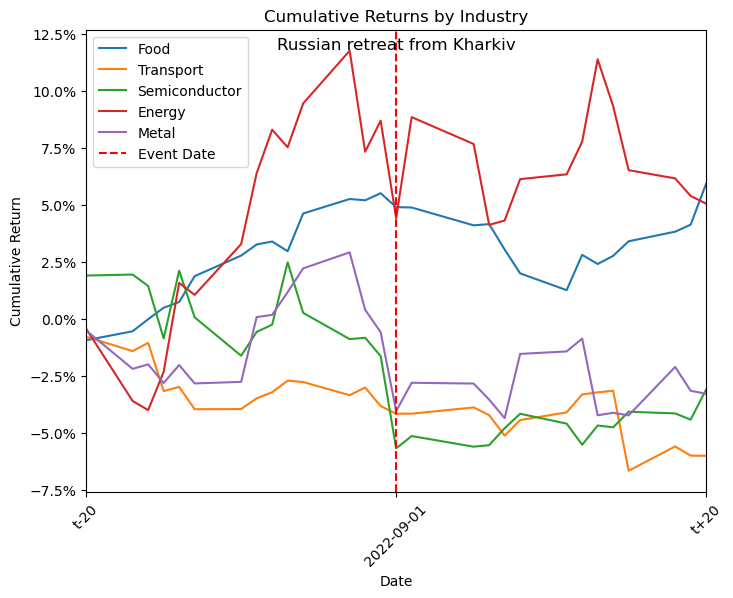

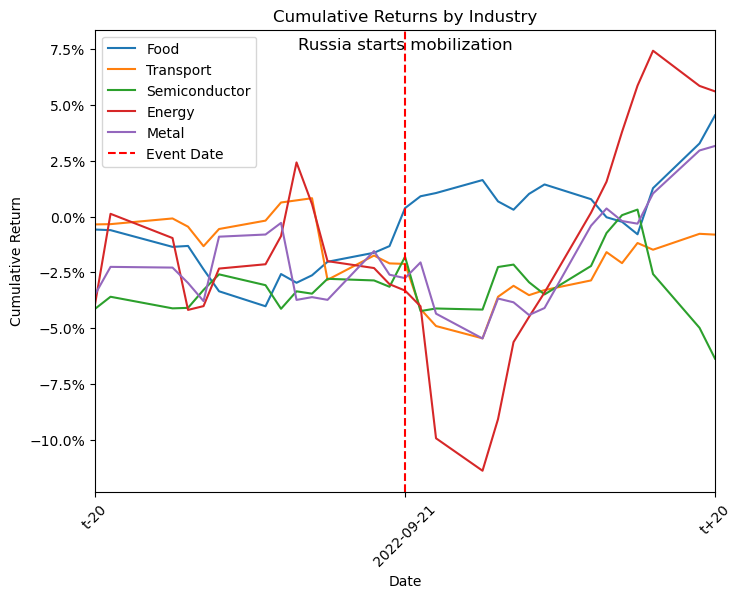

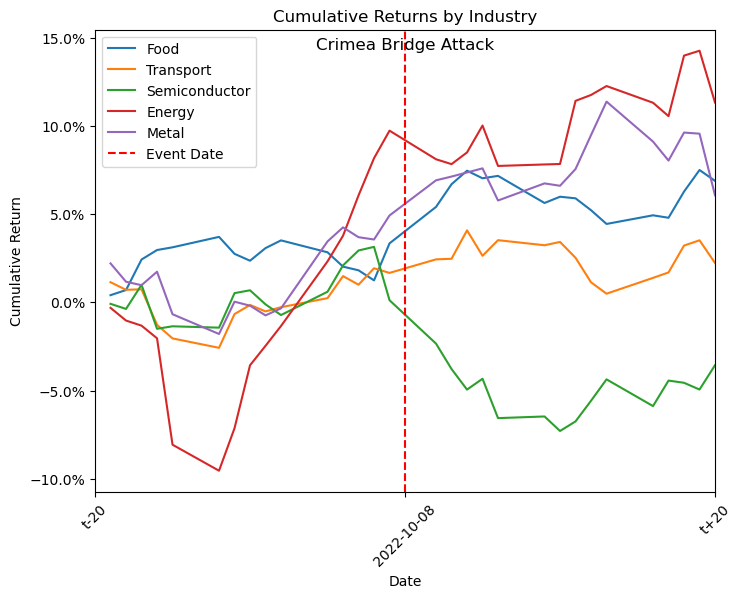

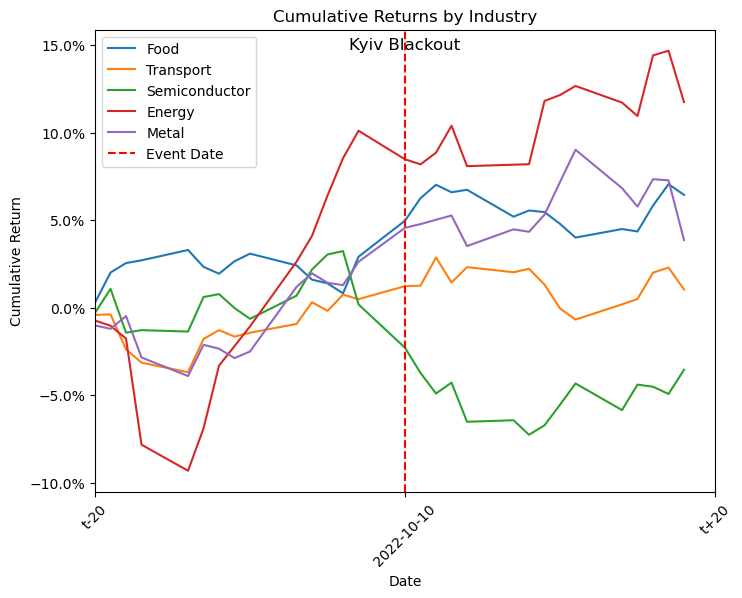

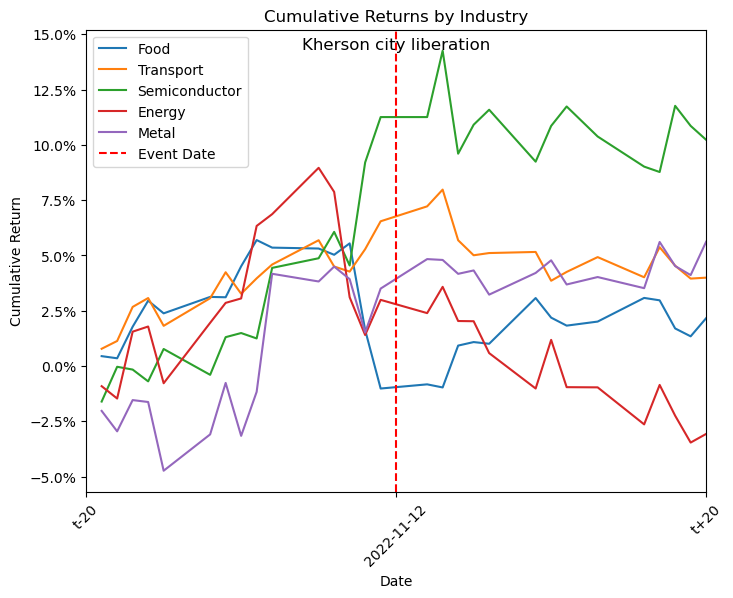

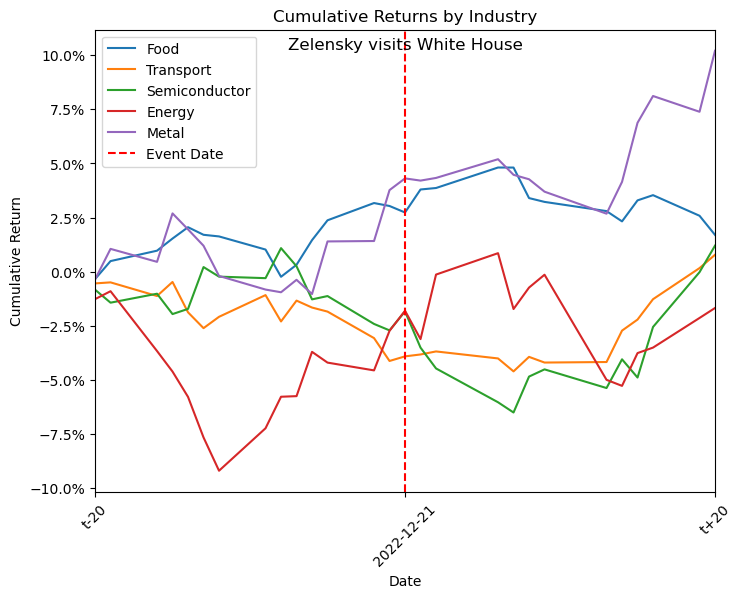

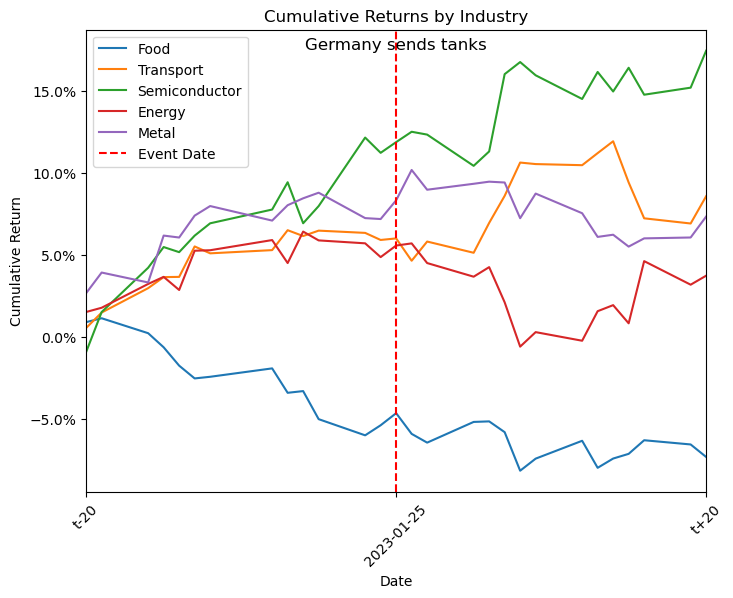

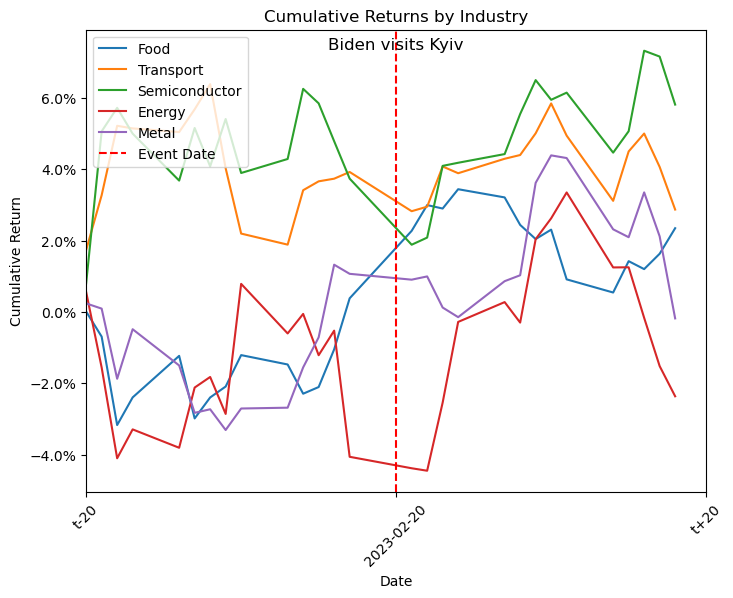

In [27]:
industries = ['Food', 'Transport', 'Semiconductor', 'Energy', 'Metal']
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']
    
    sub_df = event_ret_df.query("Event == @event")
    
    plt.figure(figsize=(8, 6))
    sns.lineplot(x='Date', y='Cum_ret', data=sub_df, hue="Industry")
    
    plt.axvline(date, color='red', linestyle='--', label='Event Date')
    plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))
    
    xticks = [date - pd.Timedelta(days=20), date, date + pd.Timedelta(days=20)]
    xticklabels = ['t-20', date.strftime('%Y-%m-%d'), 't+20']
    plt.xticks(xticks, xticklabels)
    plt.xticks(rotation=45)
    
    plt.title('Cumulative Returns by Industry')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    
    ymin, ymax = plt.ylim()
    y_pos = ymax - (ymax - ymin) * 0.05

    # add text to plot
    plt.text(date, y_pos, event, fontsize=12,
             ha='center', va='bottom')

    # move the legend to the bottom right corner
    plt.legend(loc='lower right')
    plt.legend(loc='upper left')
    
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # format y-axis as percentages

    # show the plot
    plt.show()

## Plotting Cumulative Returns For Every Event For Every Industry (cumulative returns by events for individual industries)

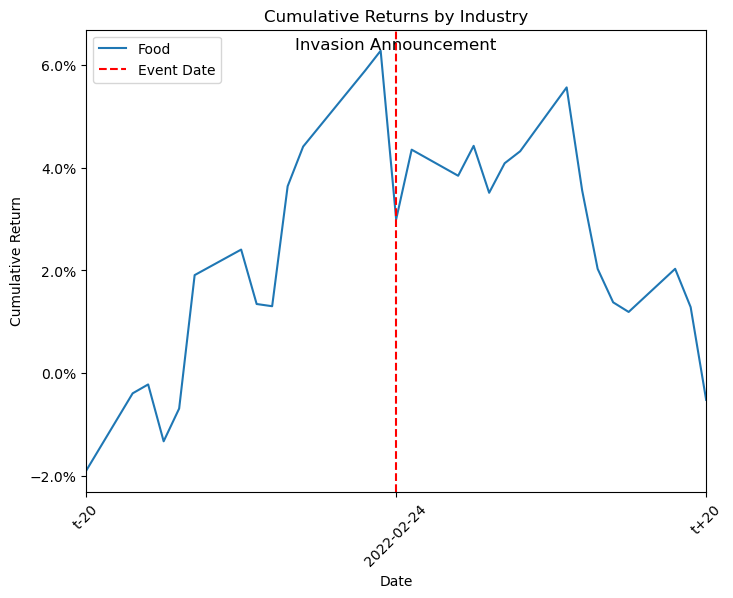

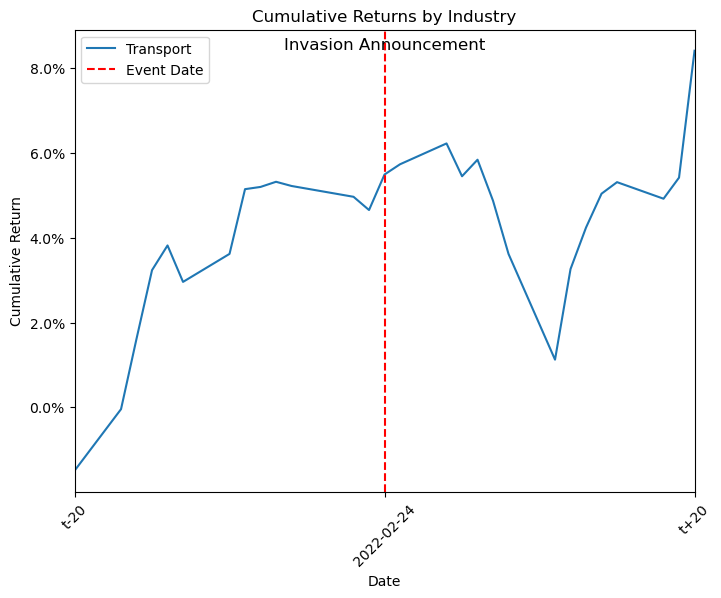

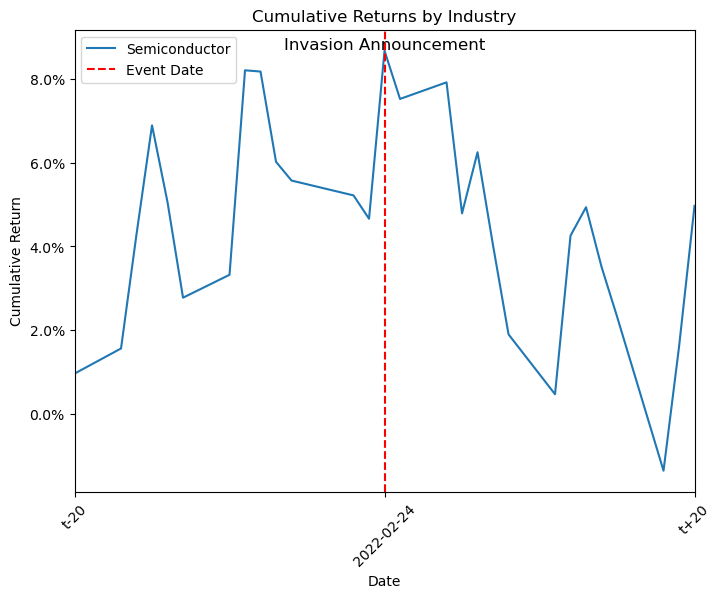

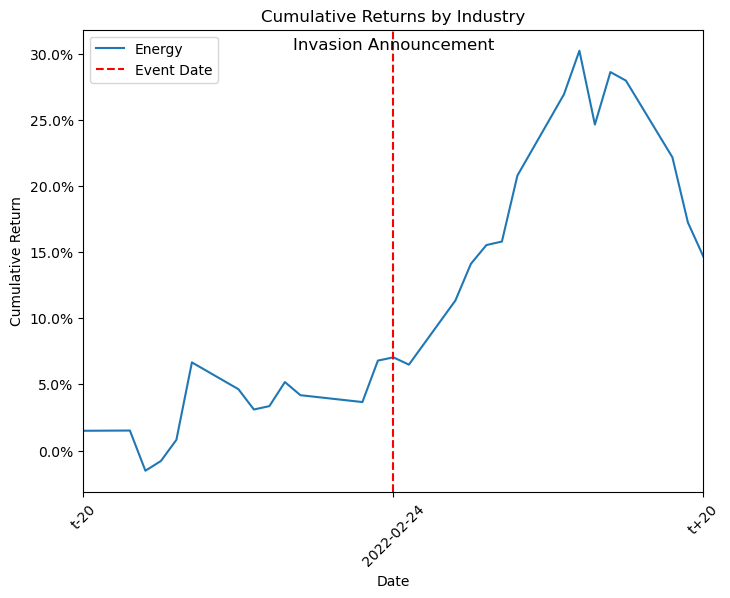

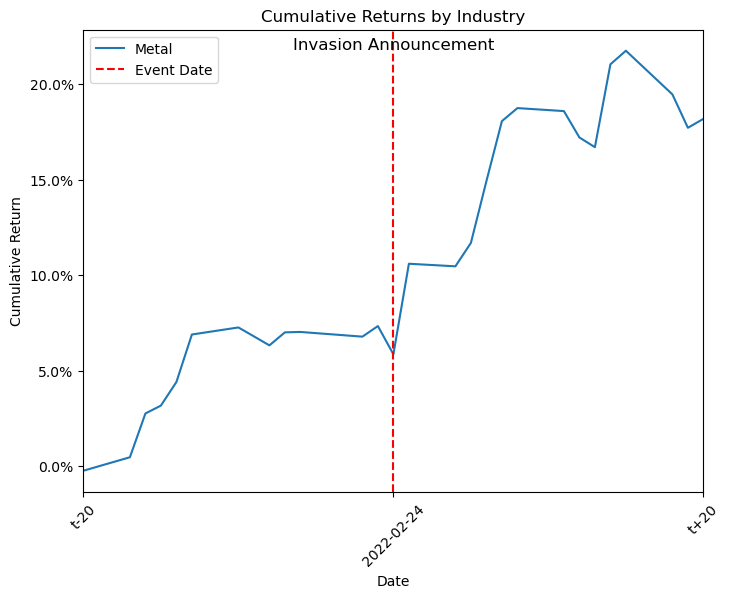

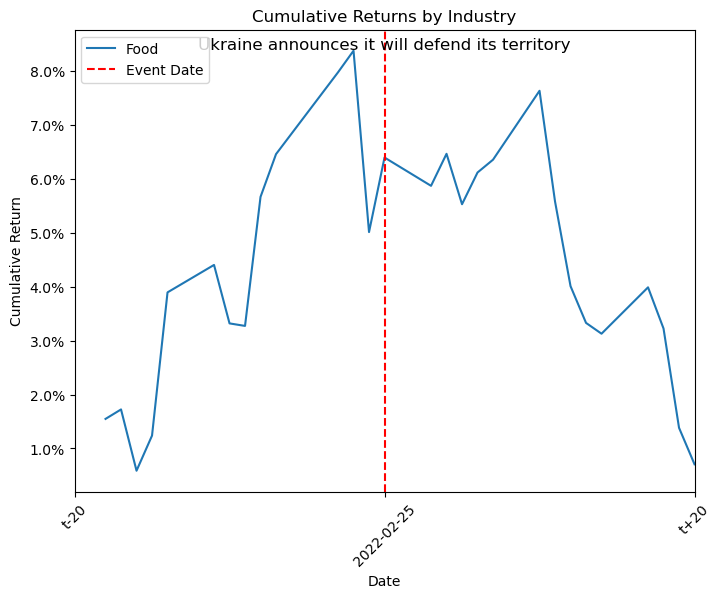

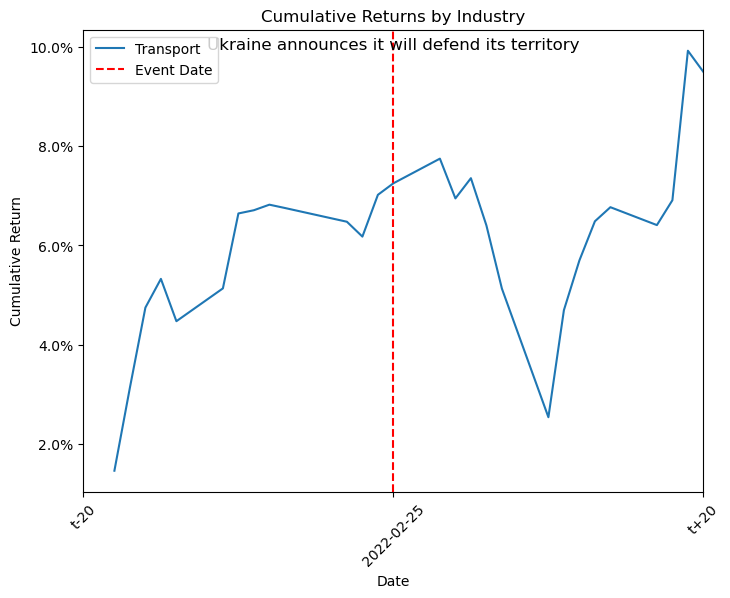

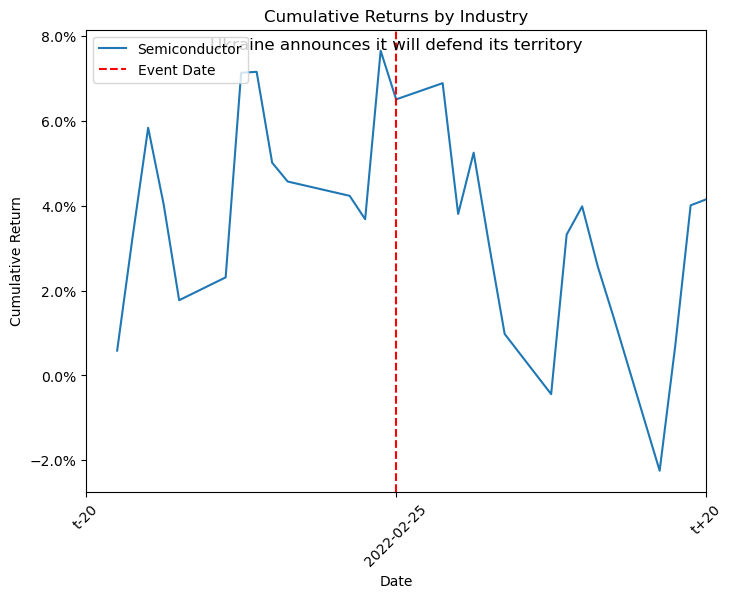

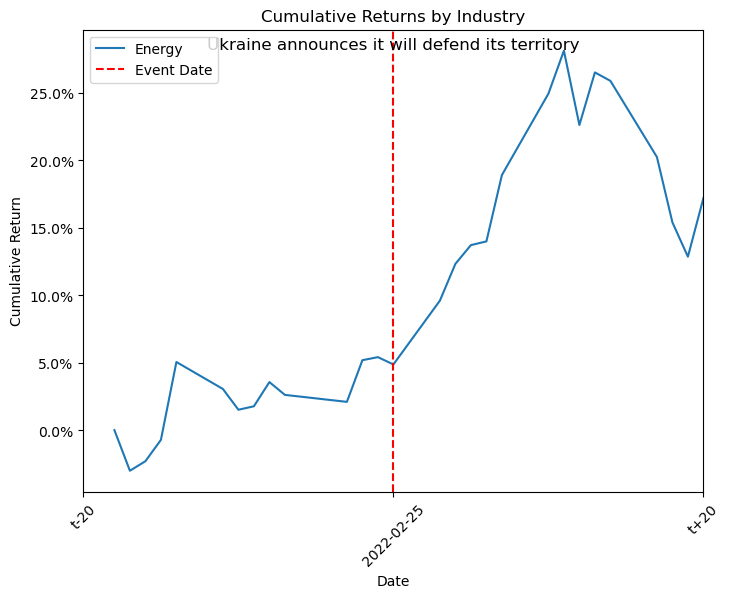

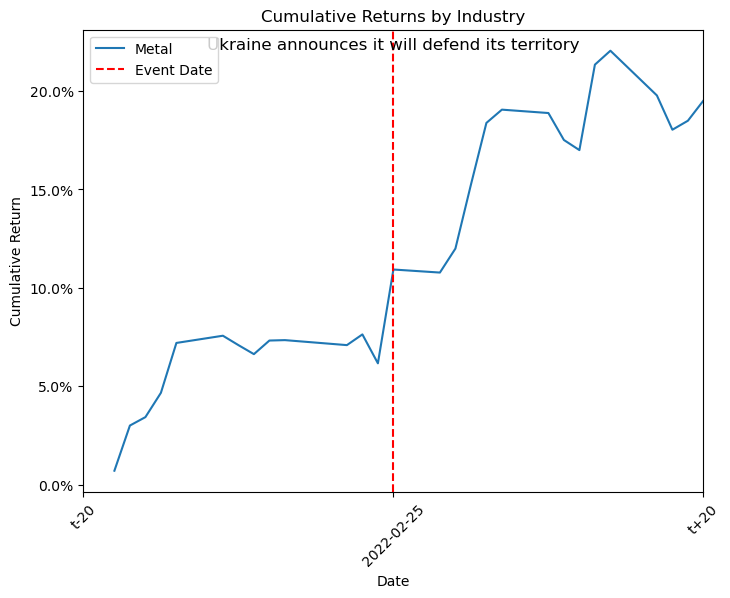

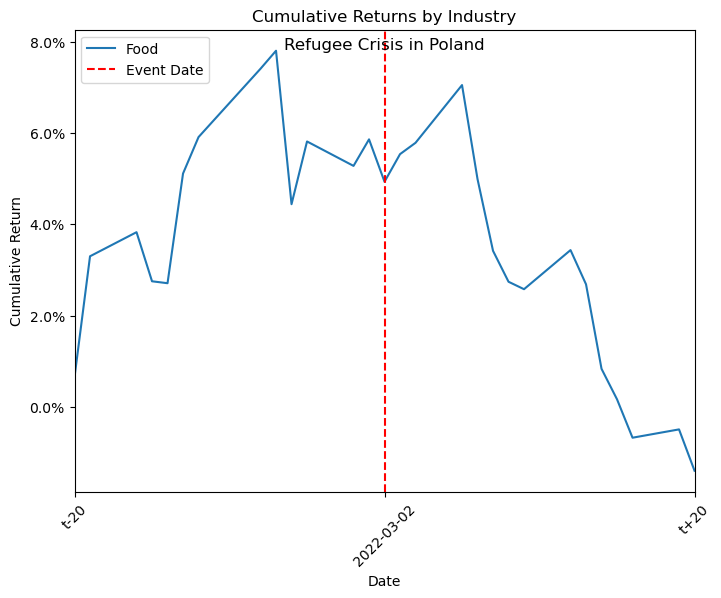

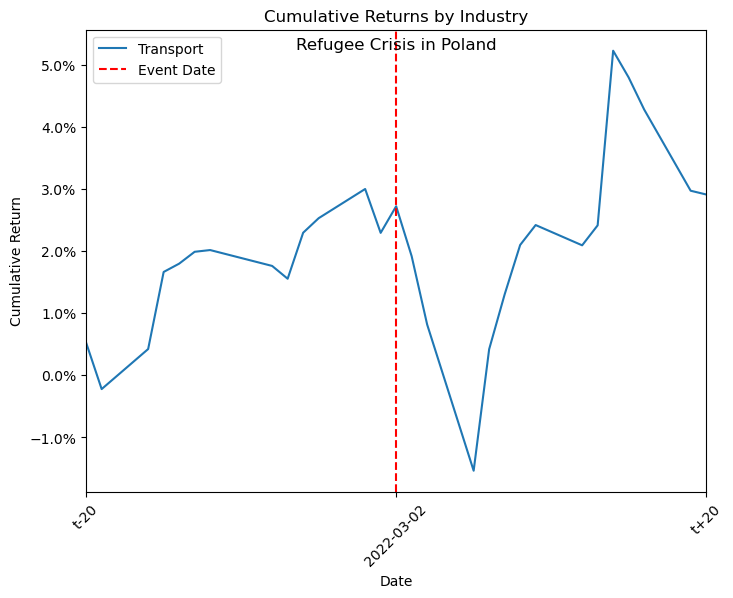

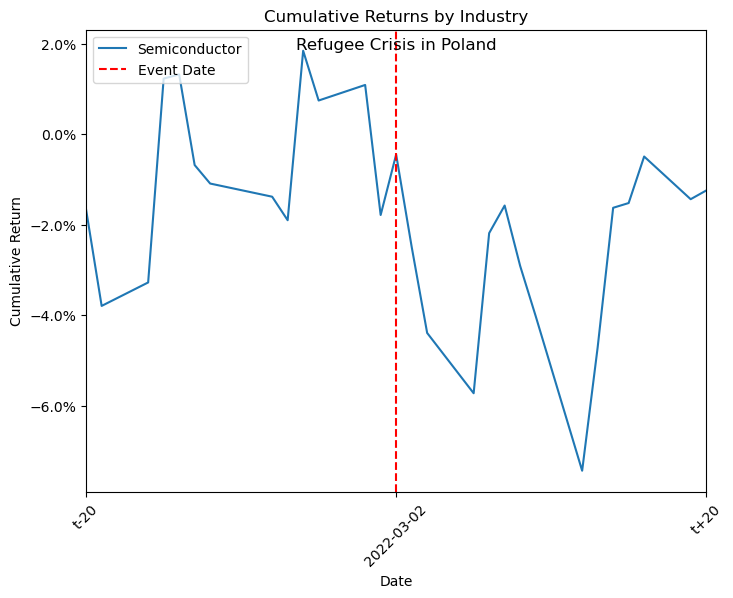

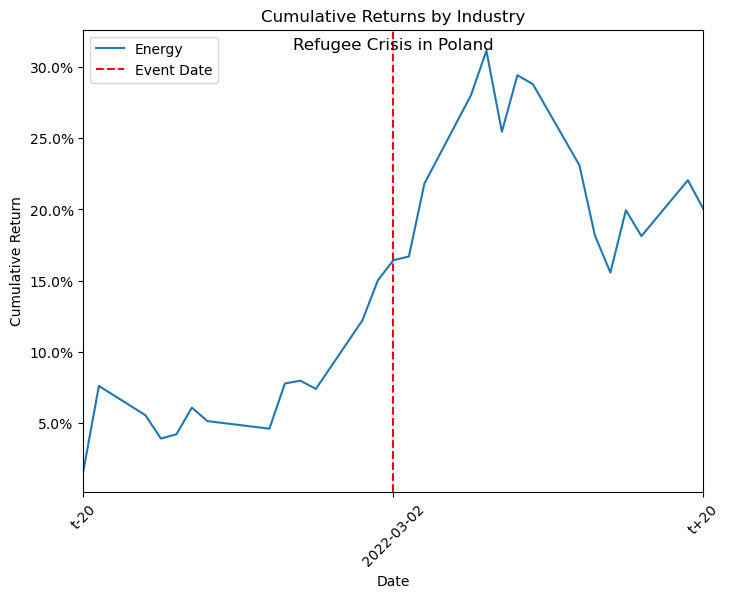

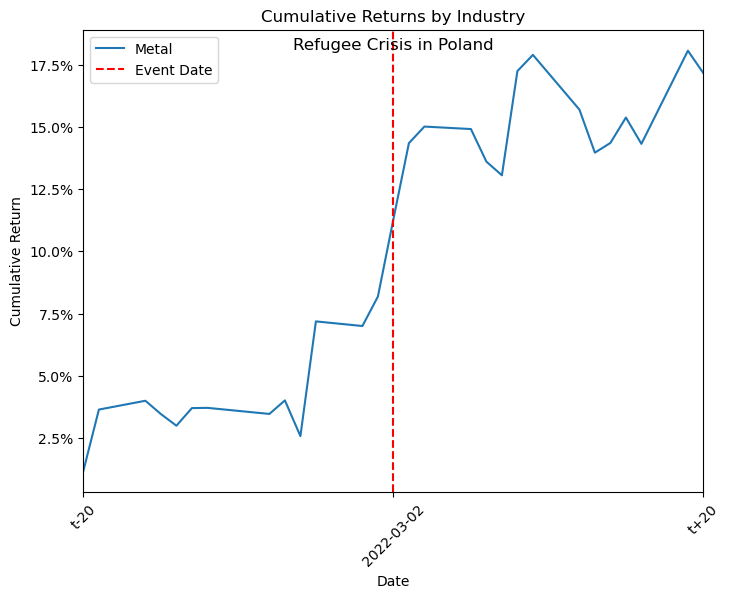

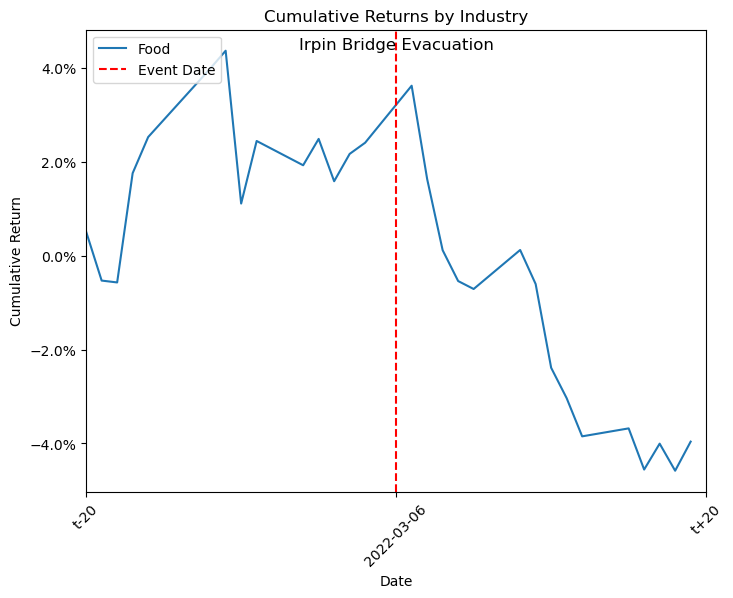

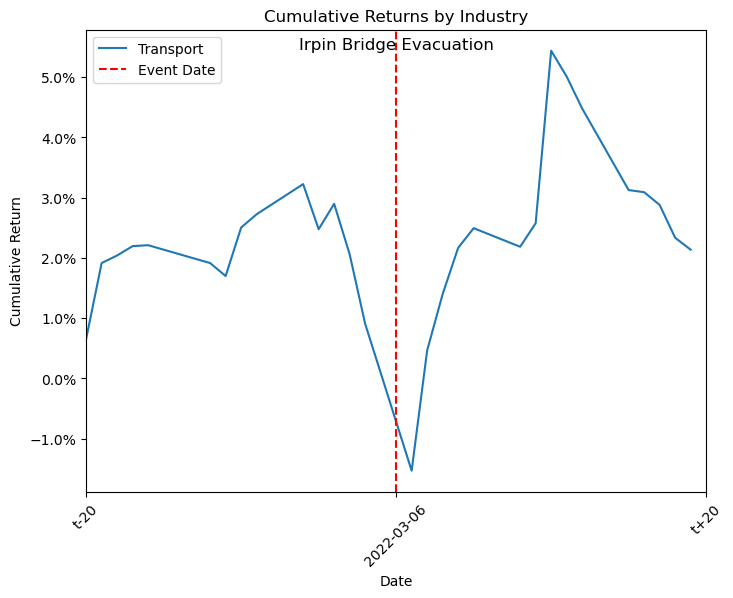

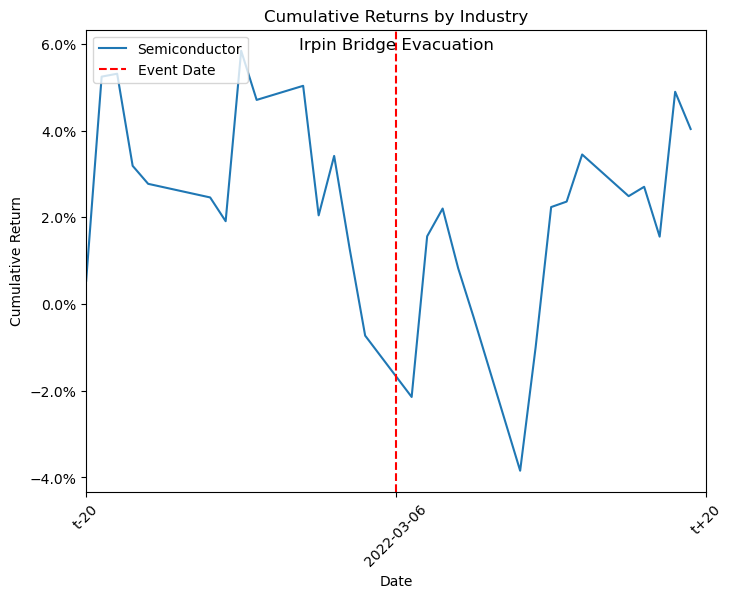

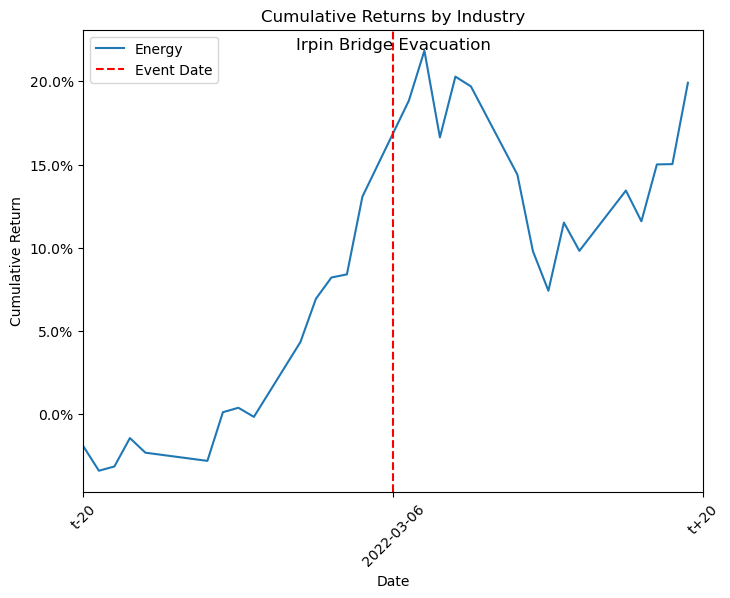

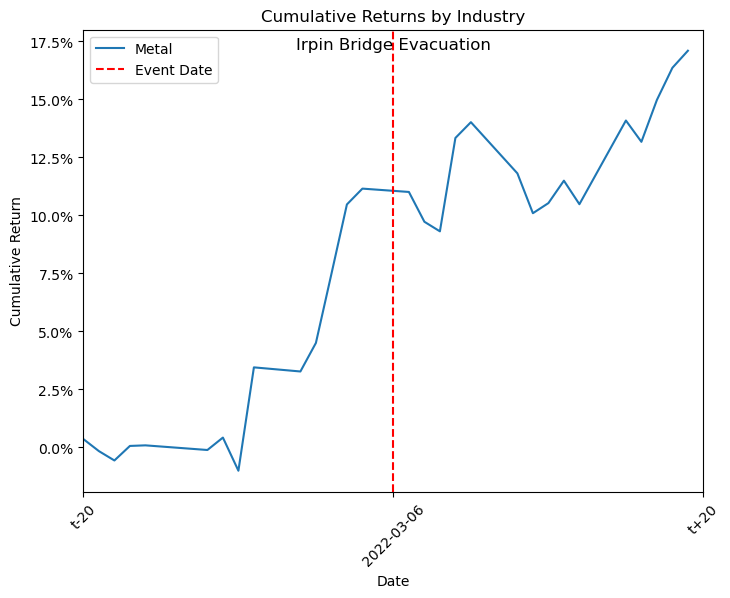

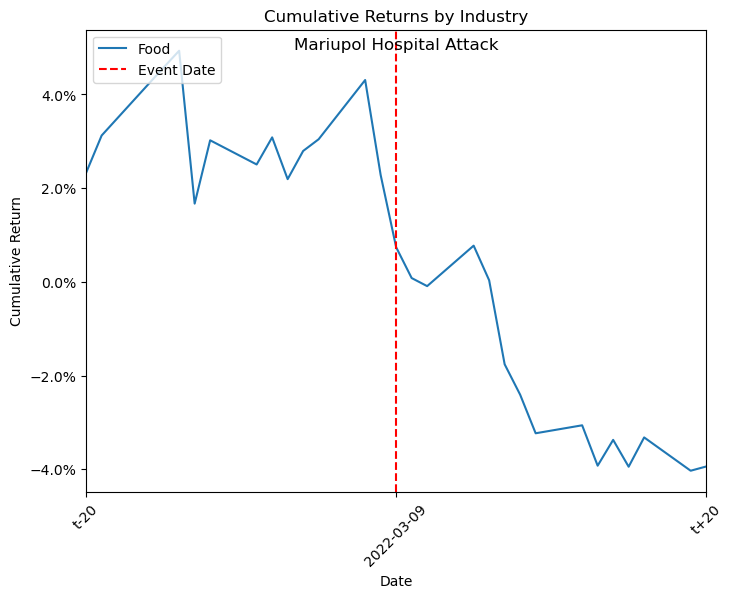

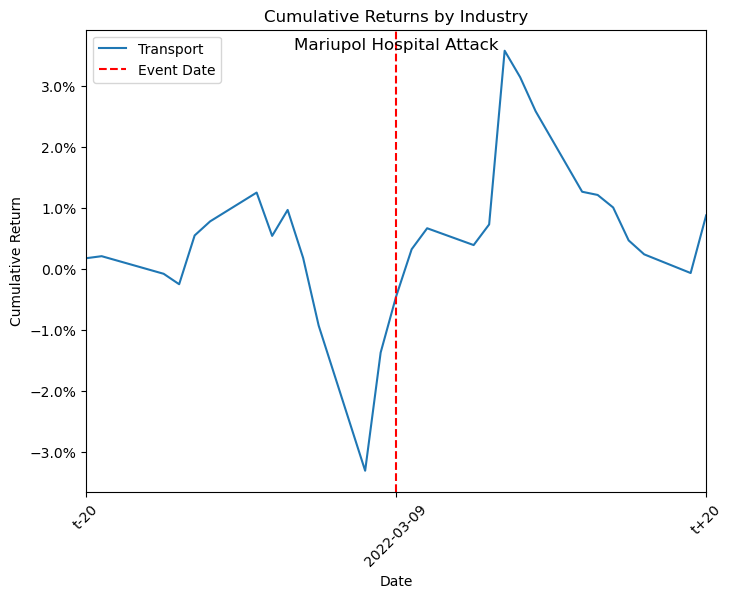

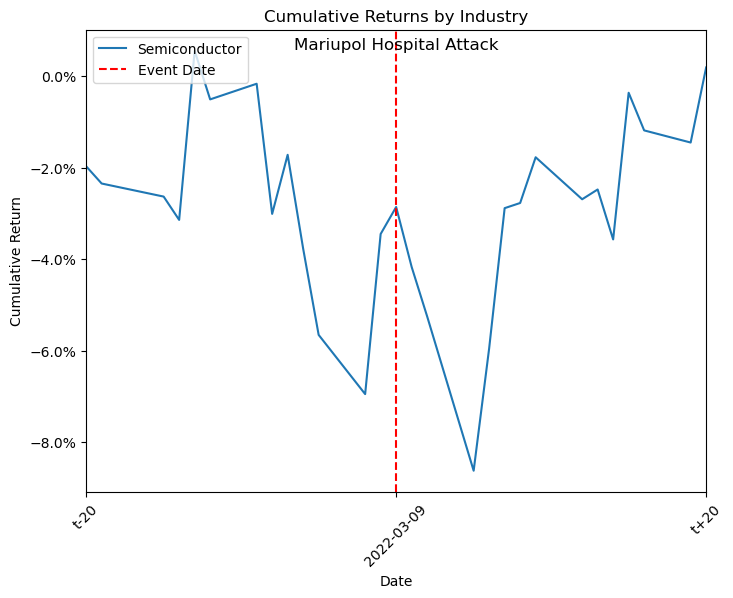

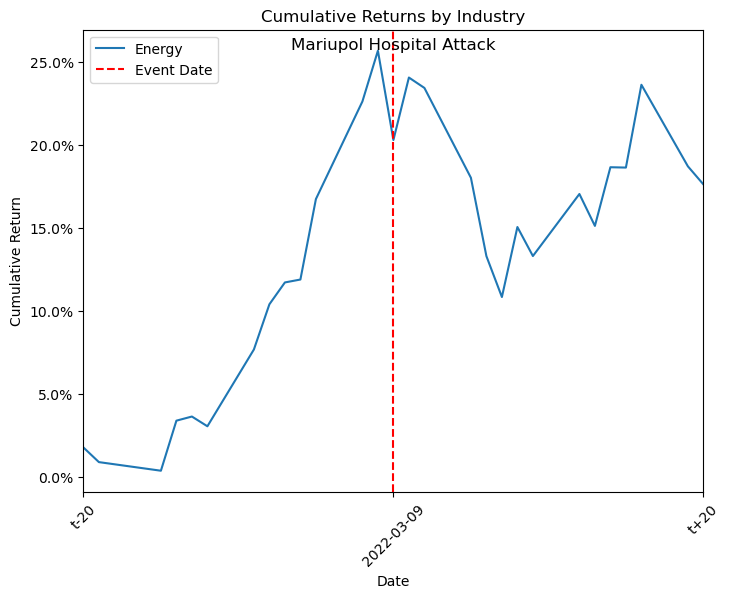

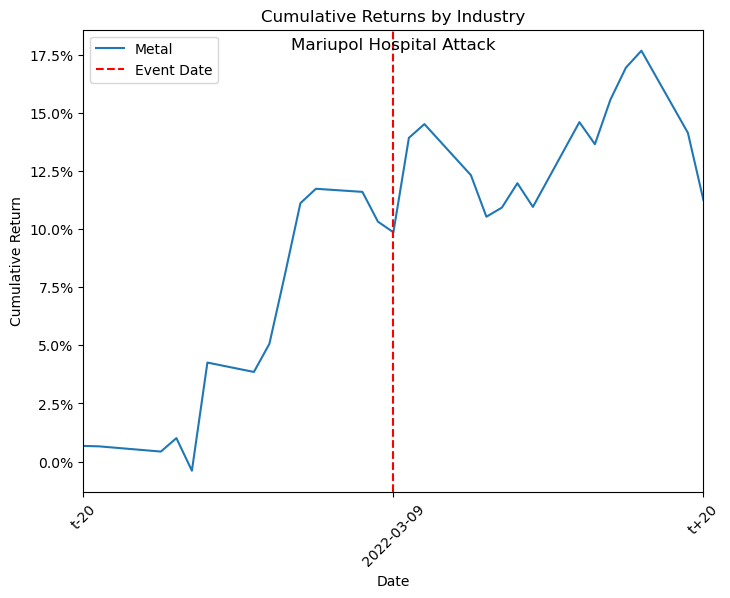

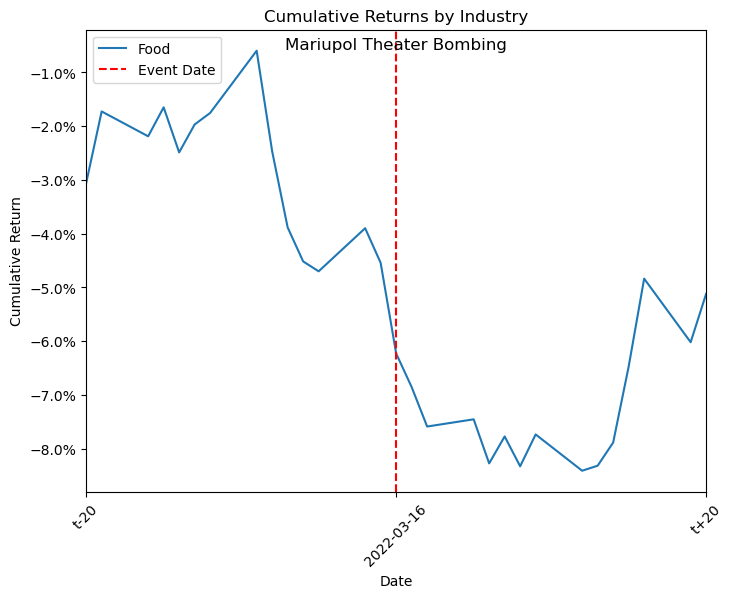

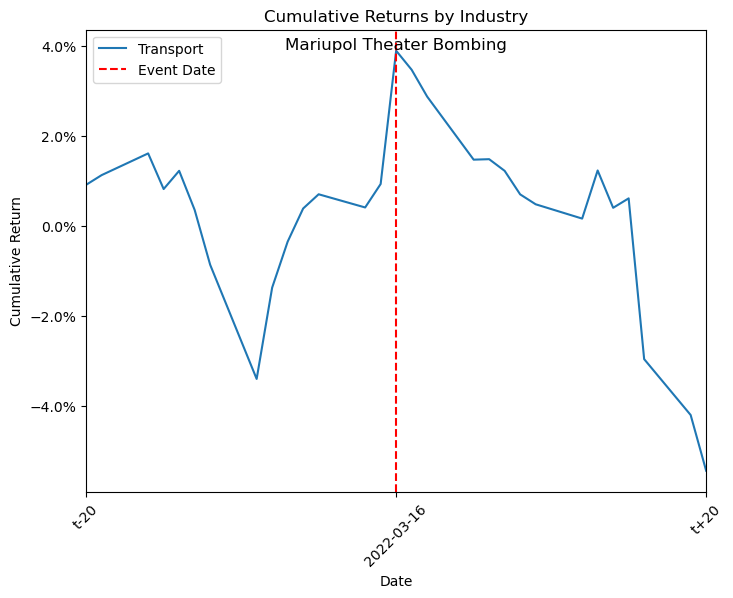

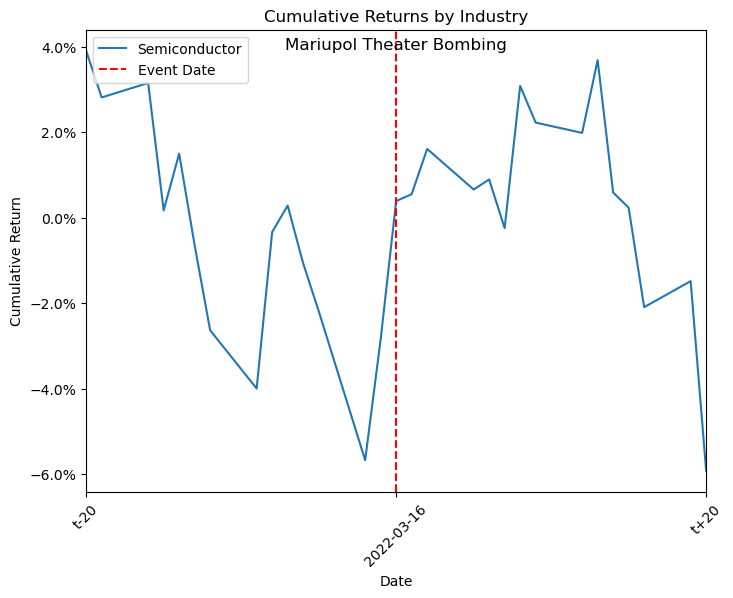

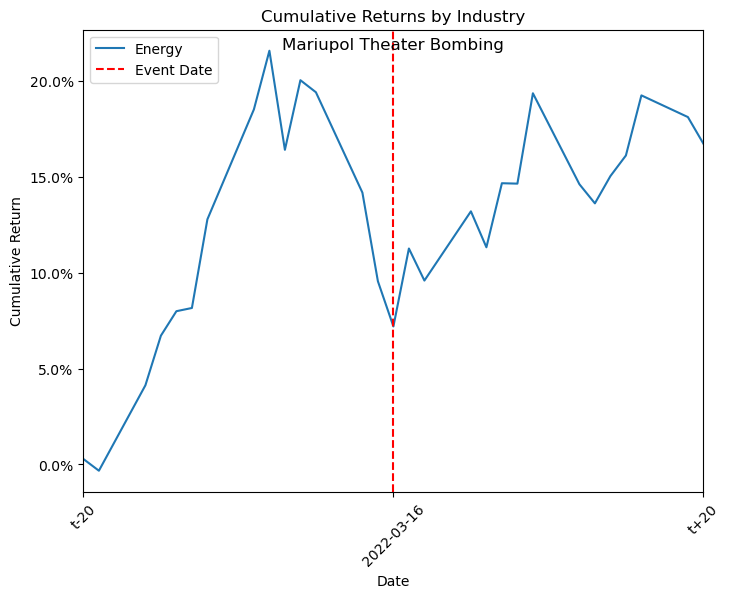

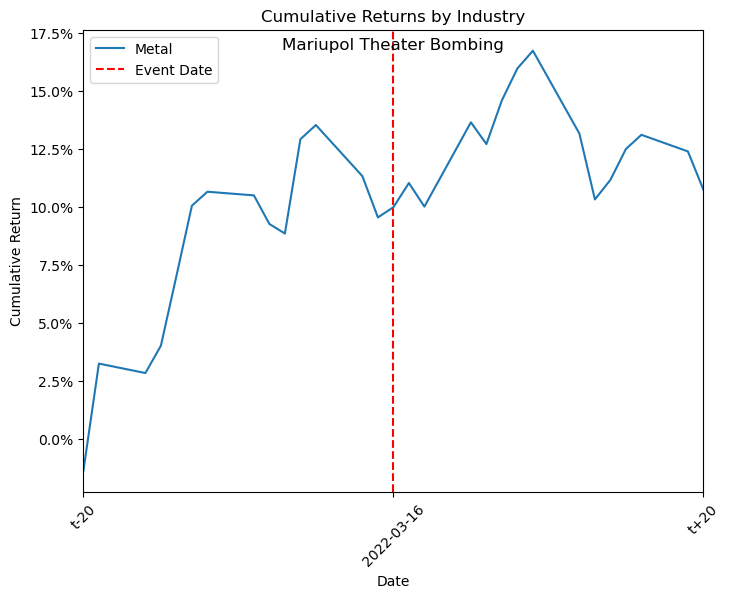

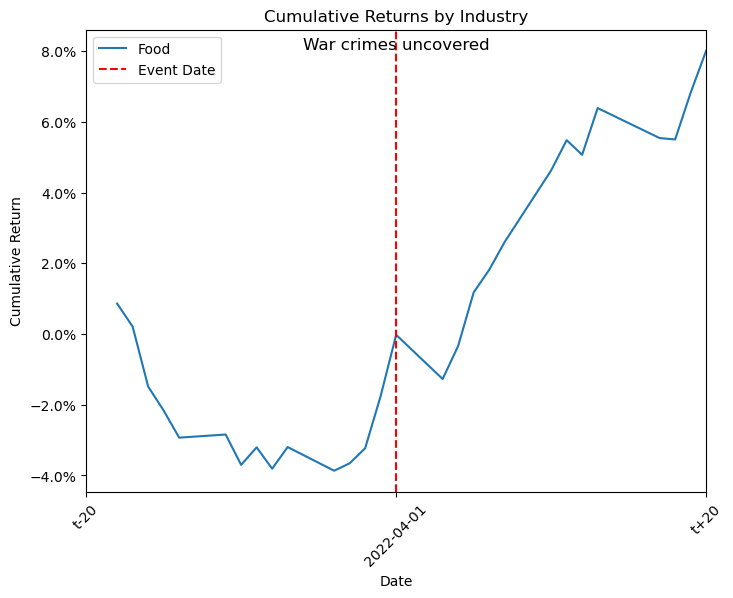

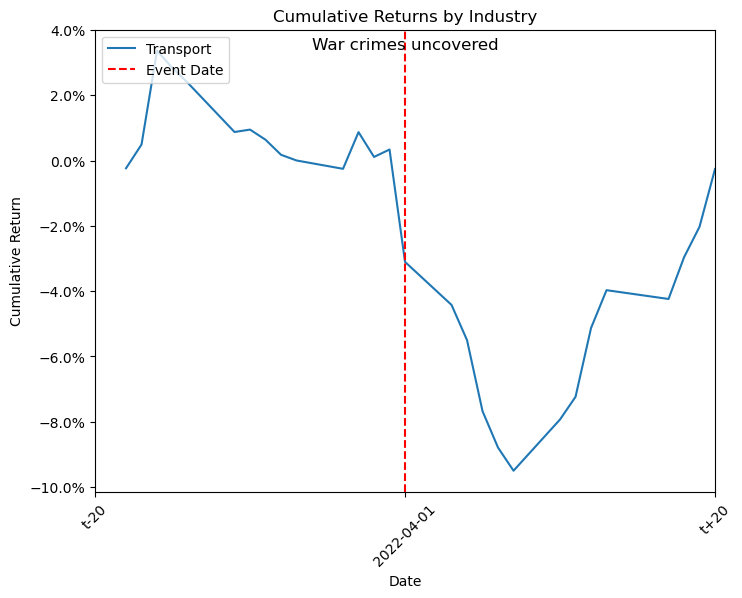

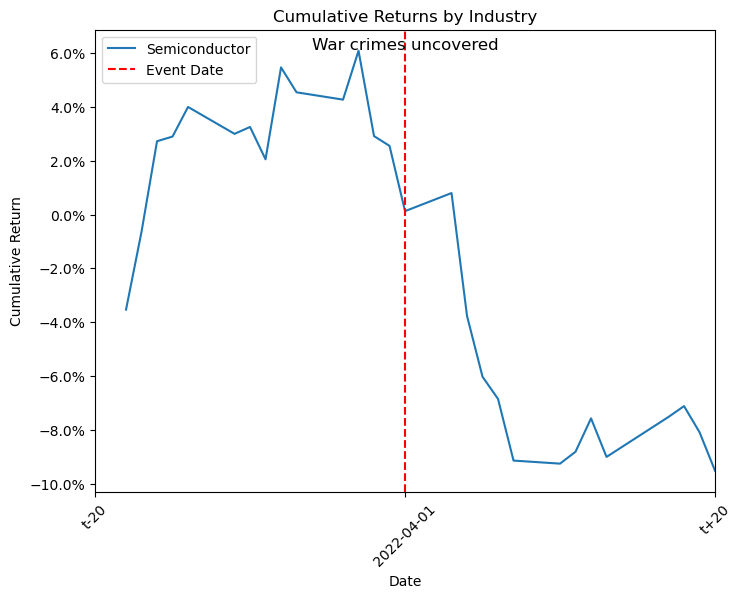

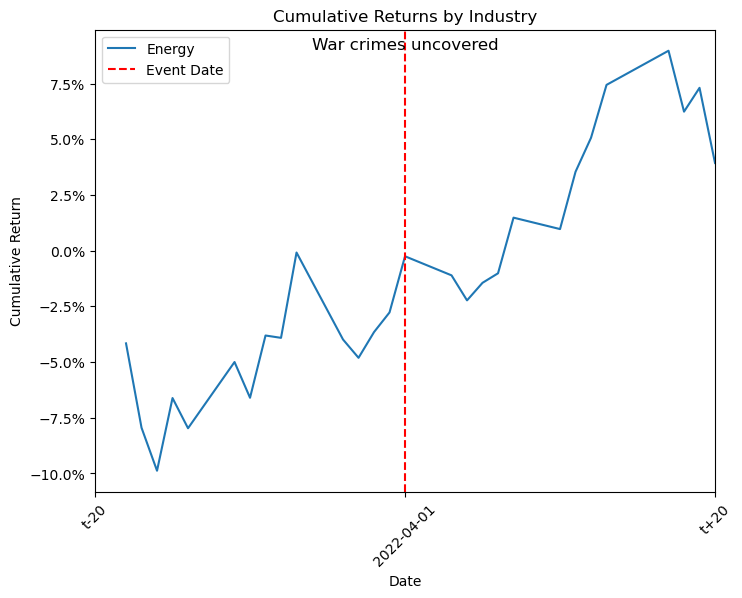

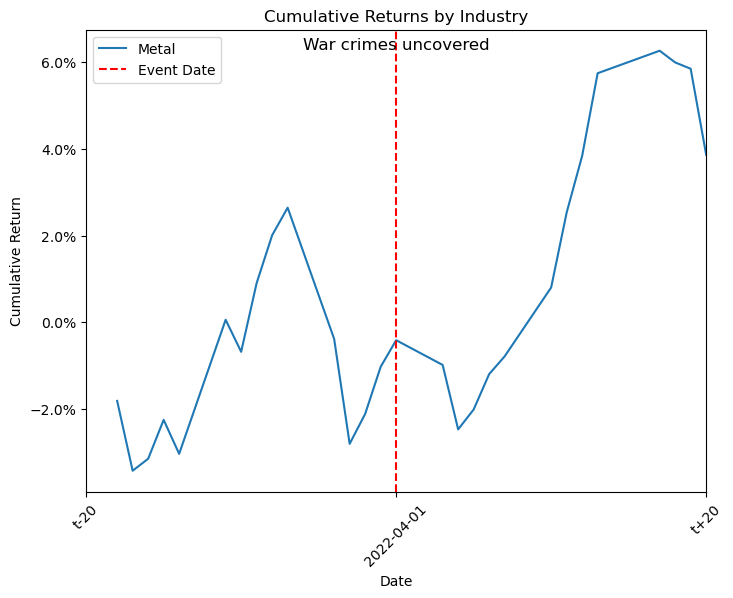

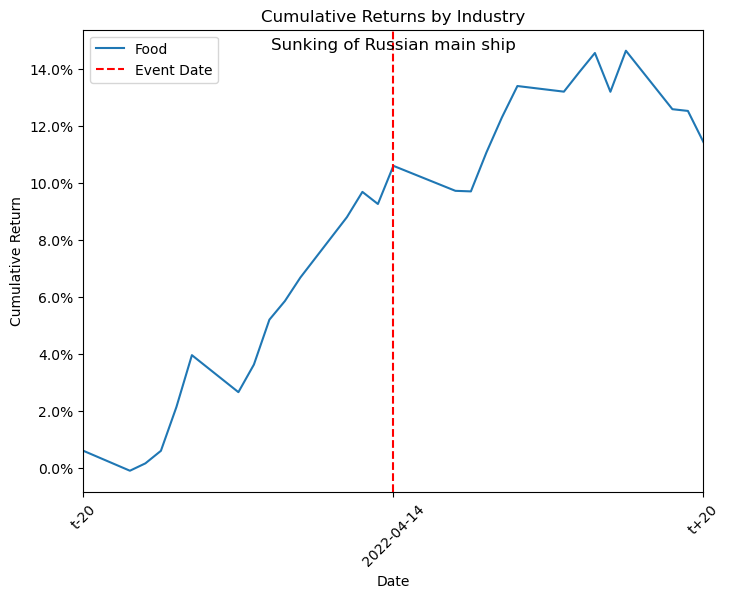

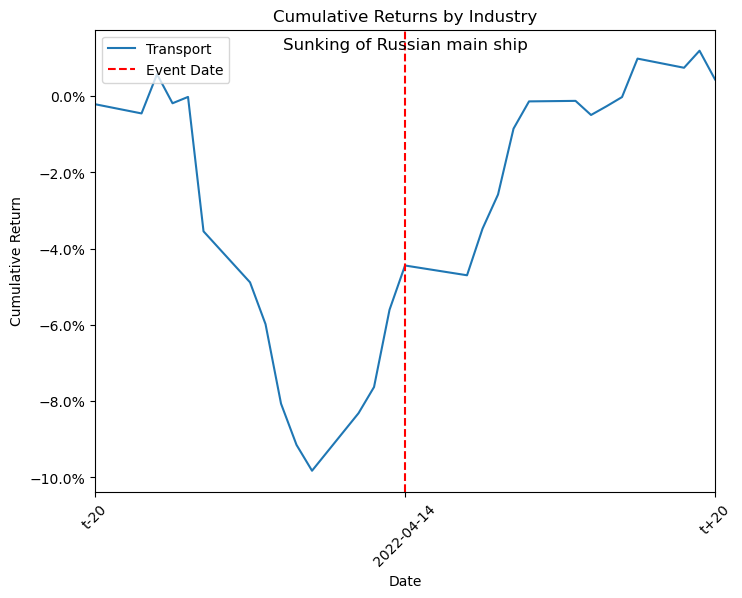

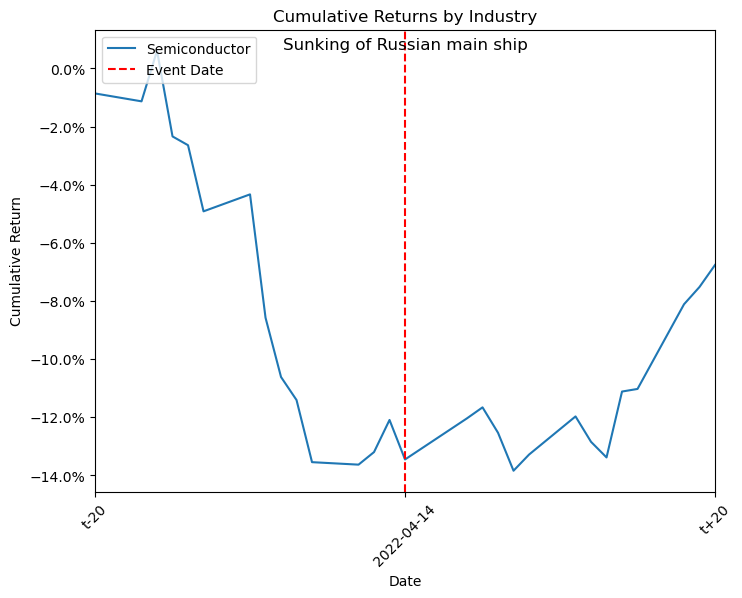

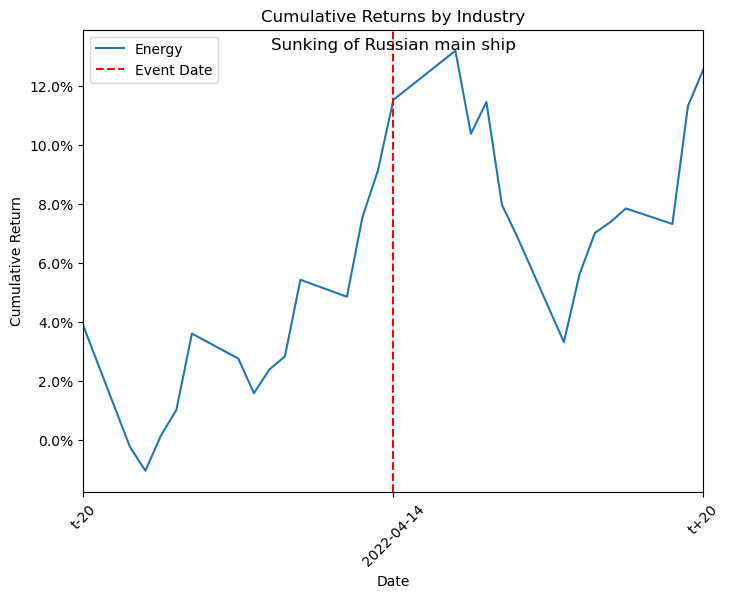

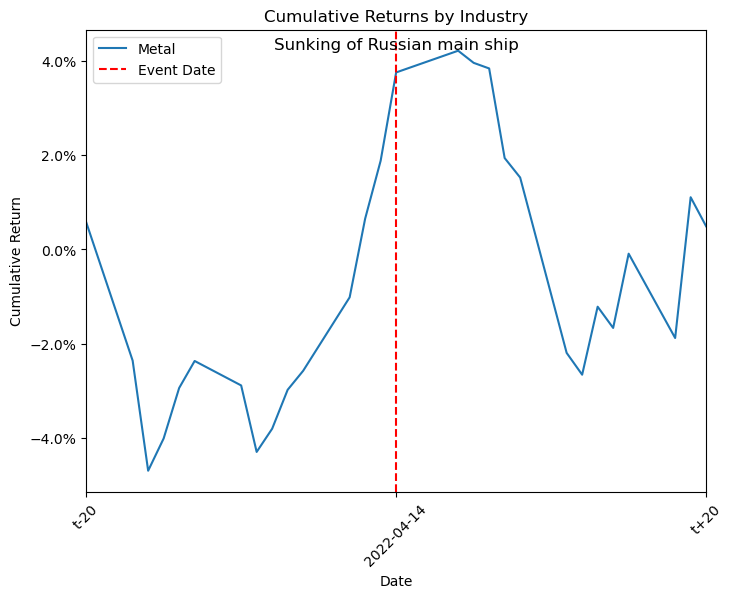

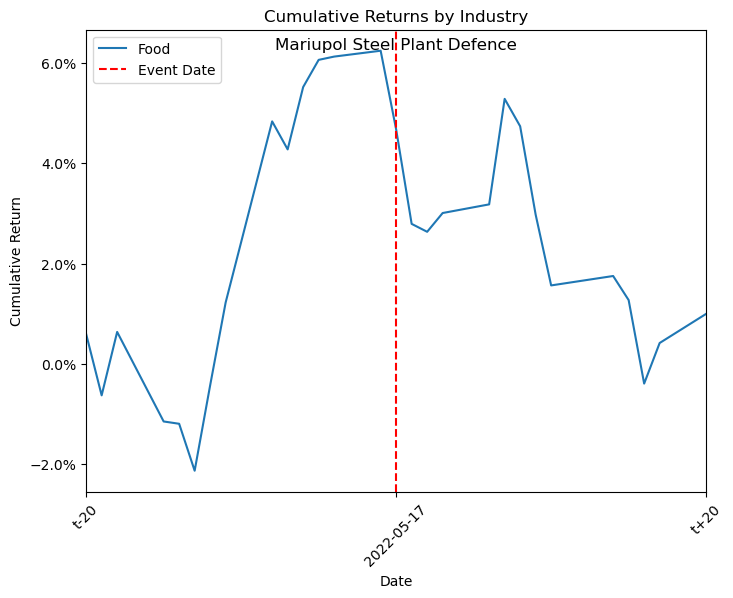

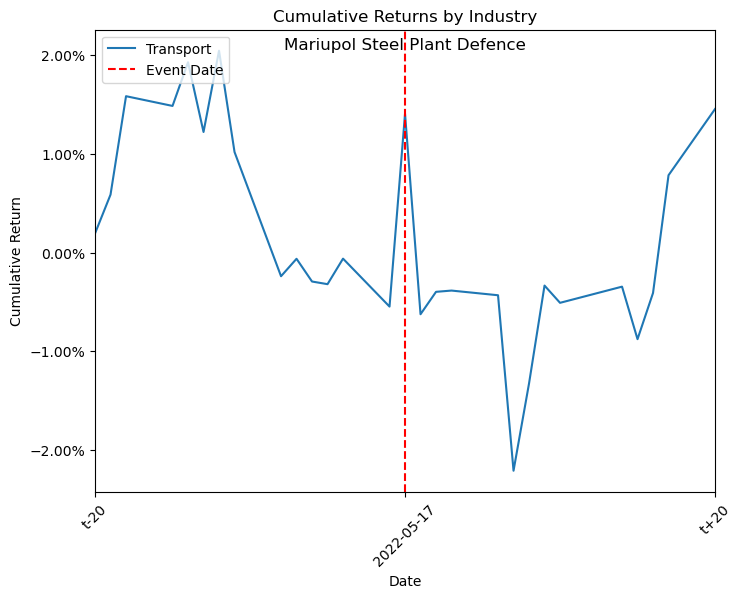

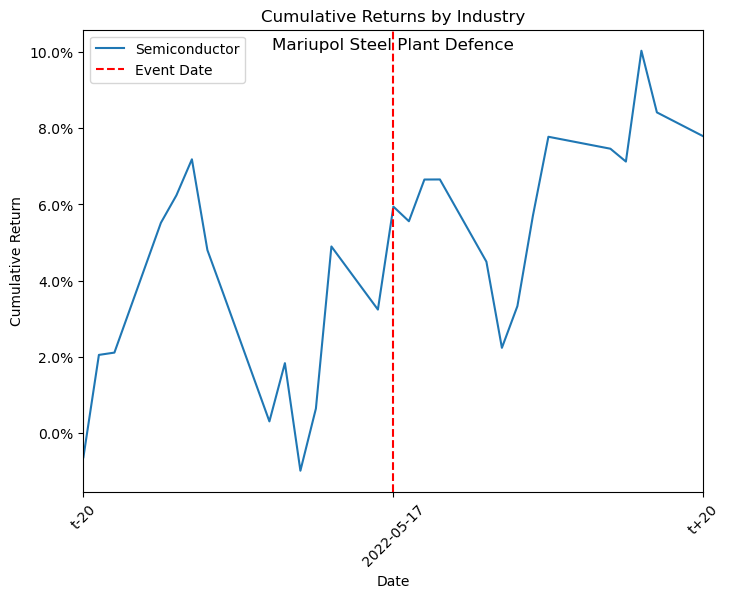

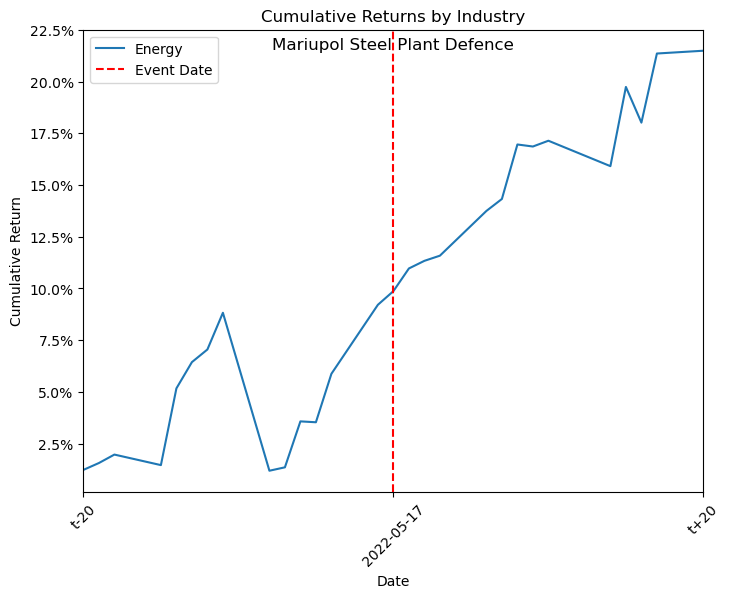

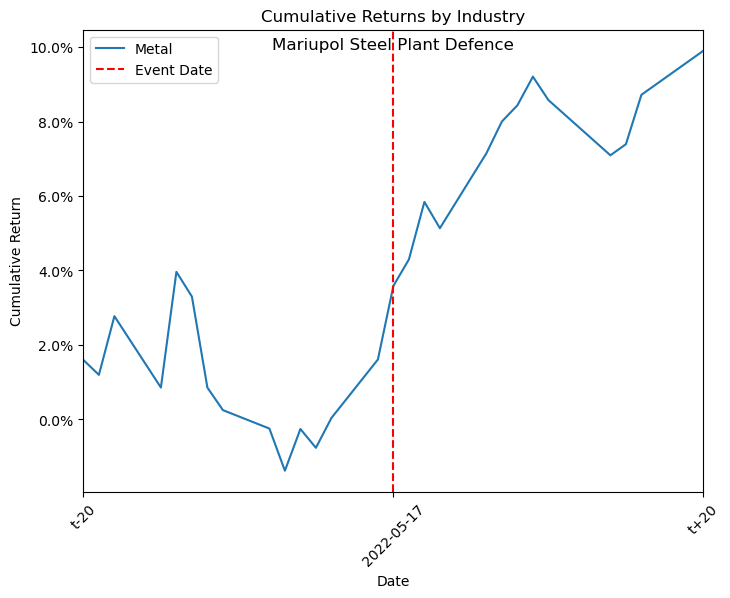

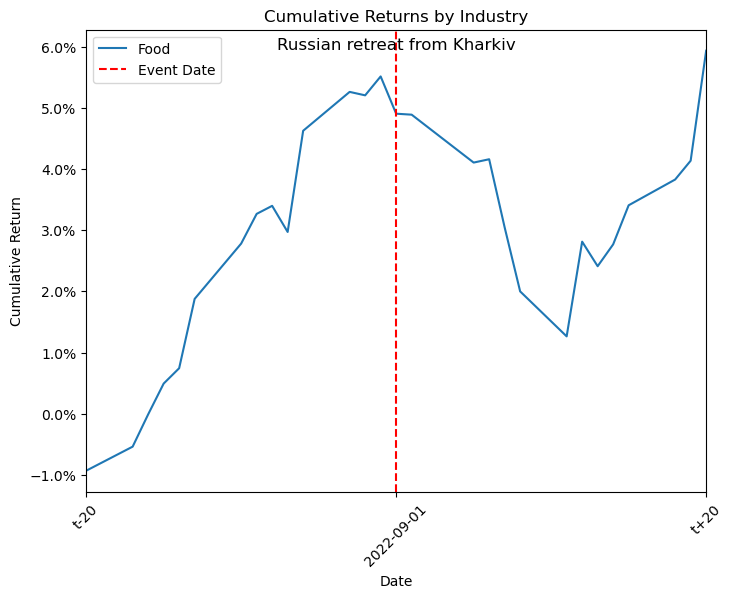

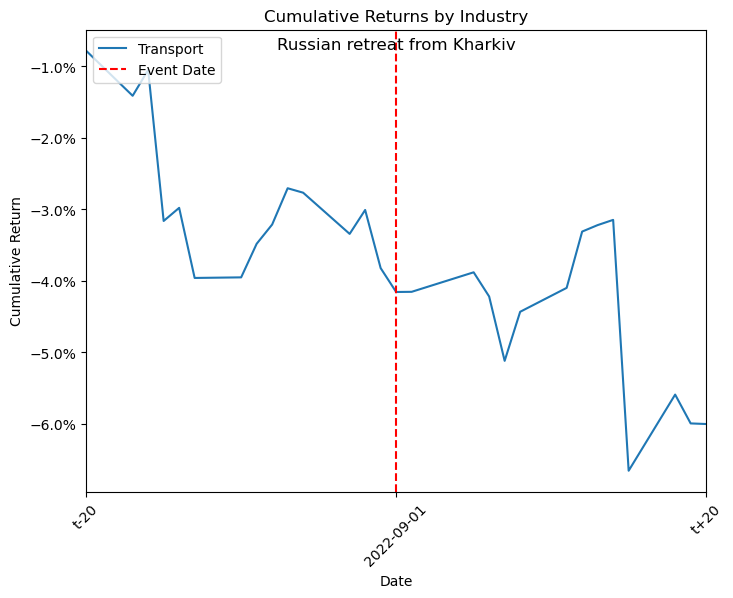

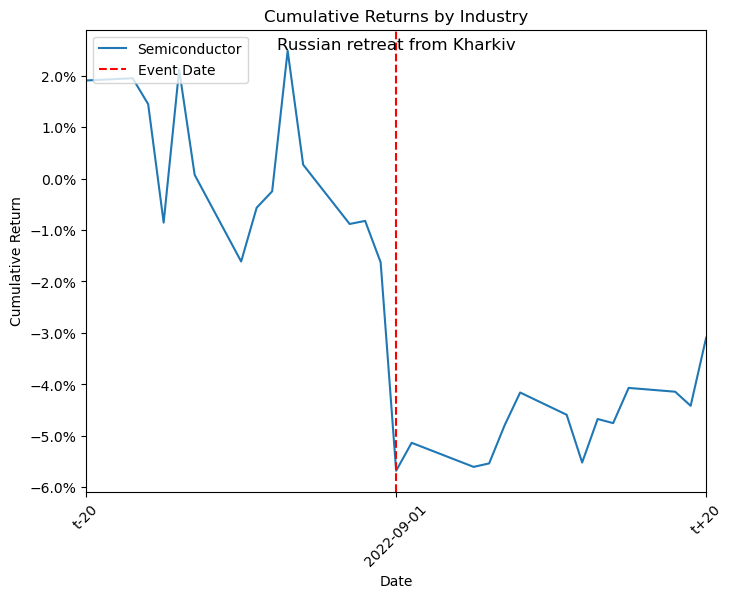

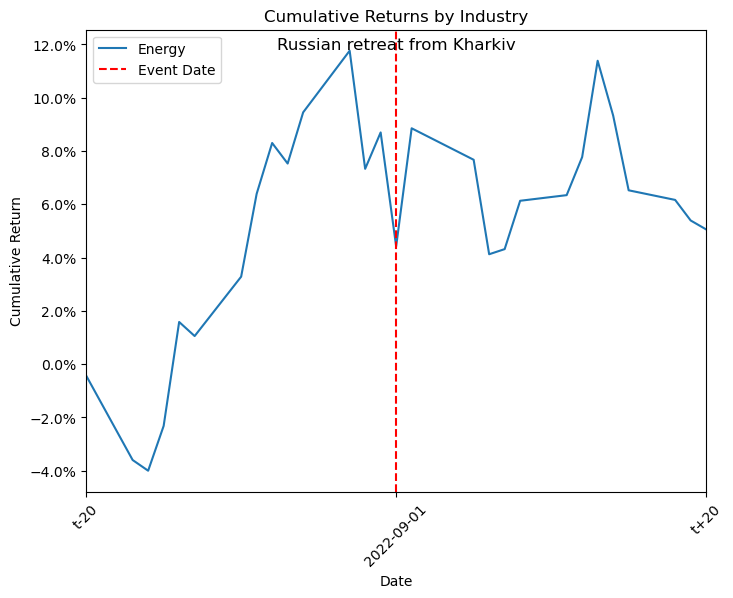

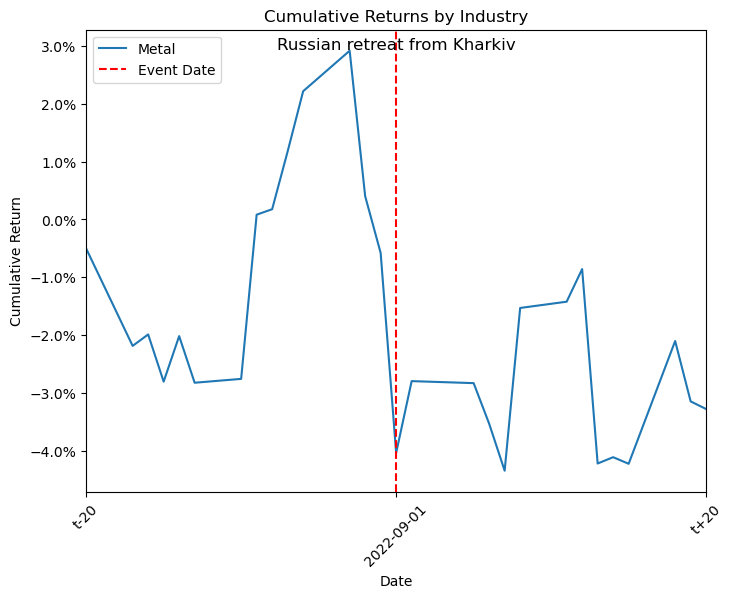

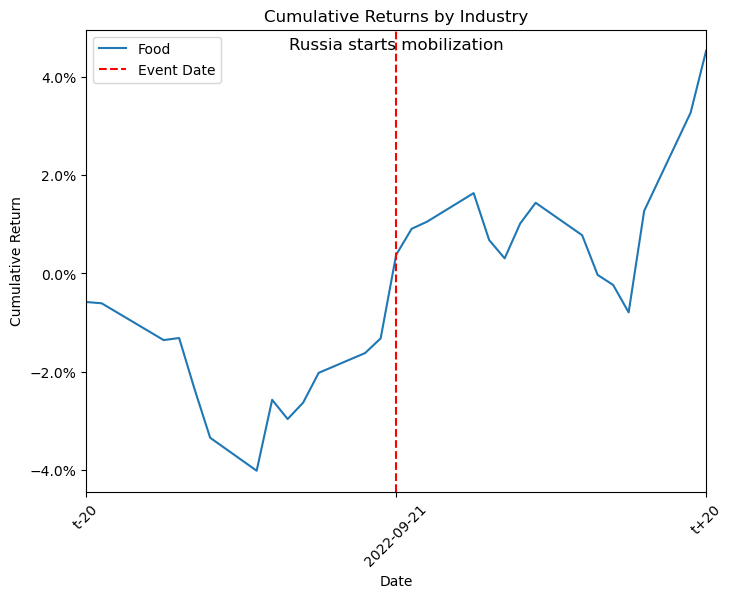

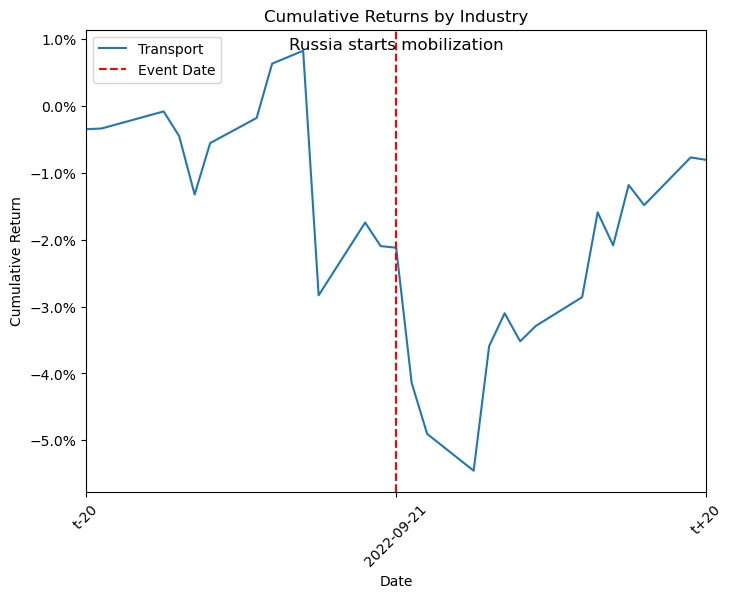

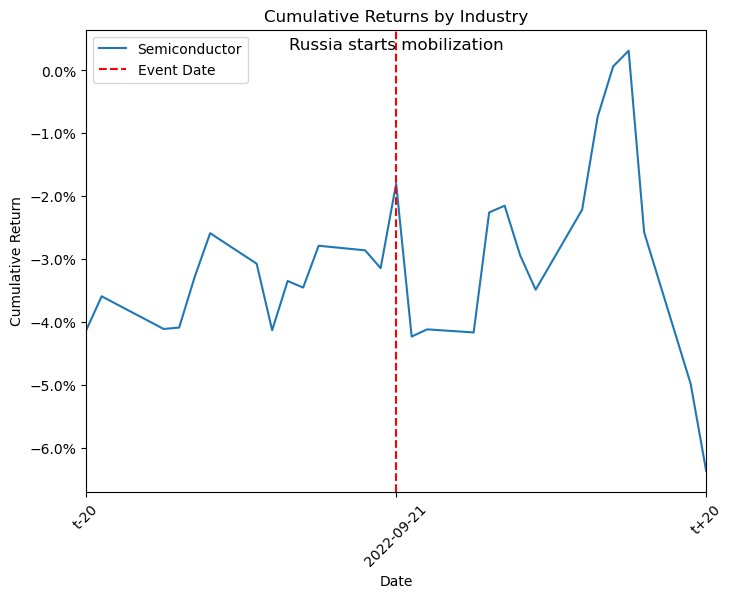

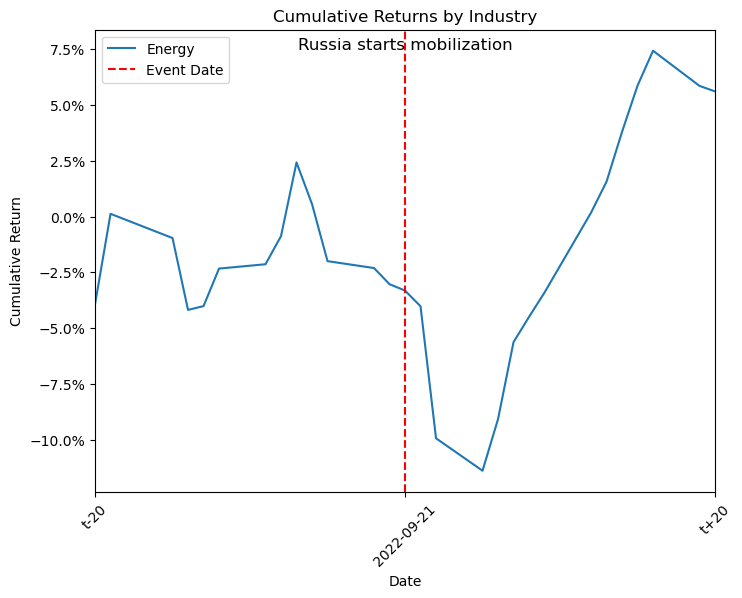

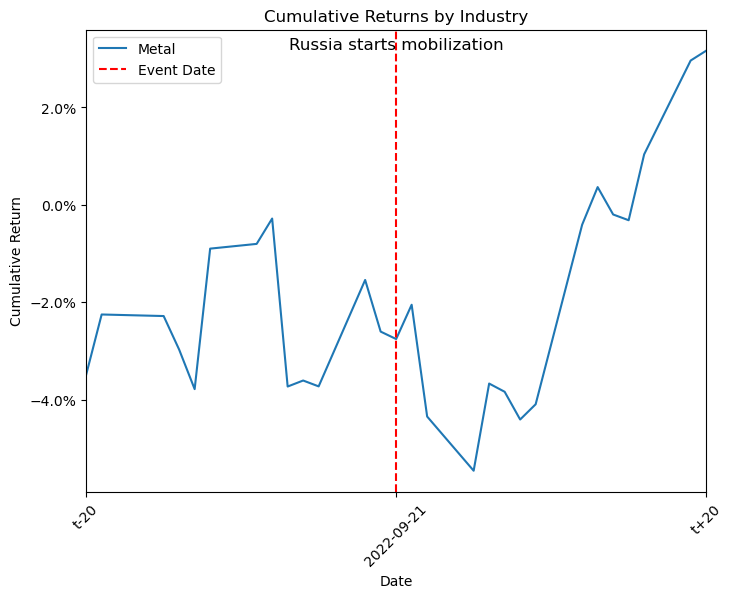

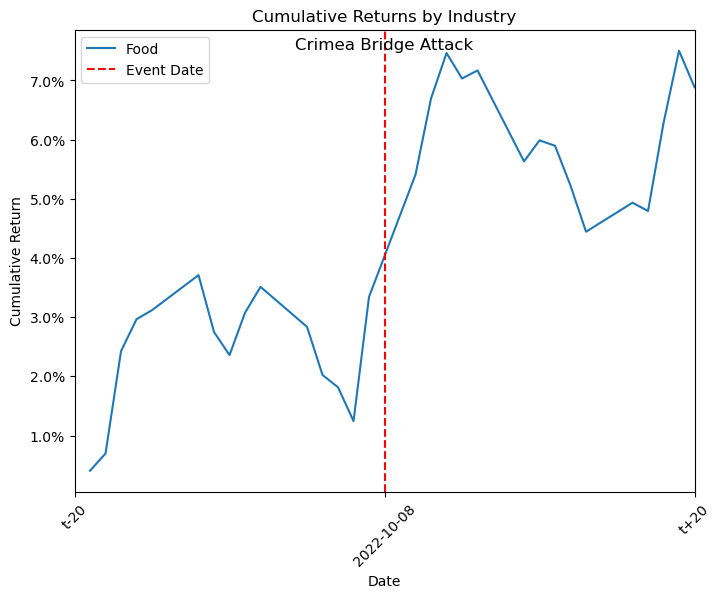

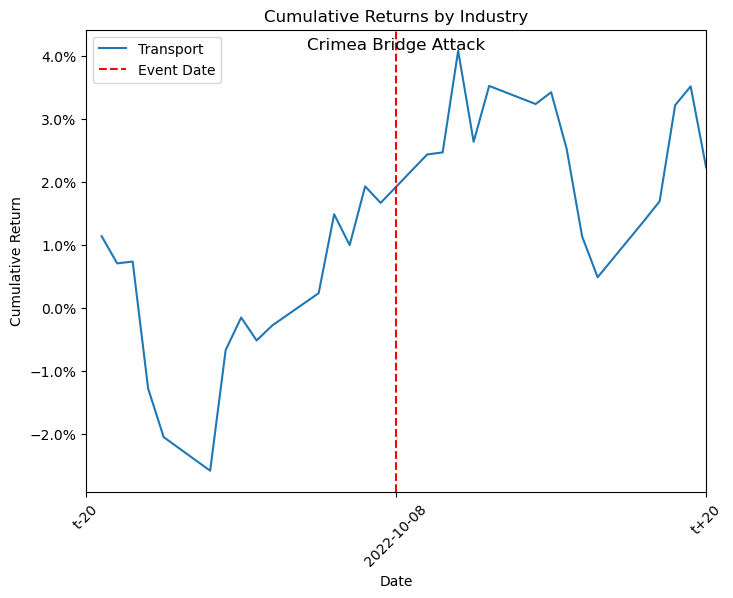

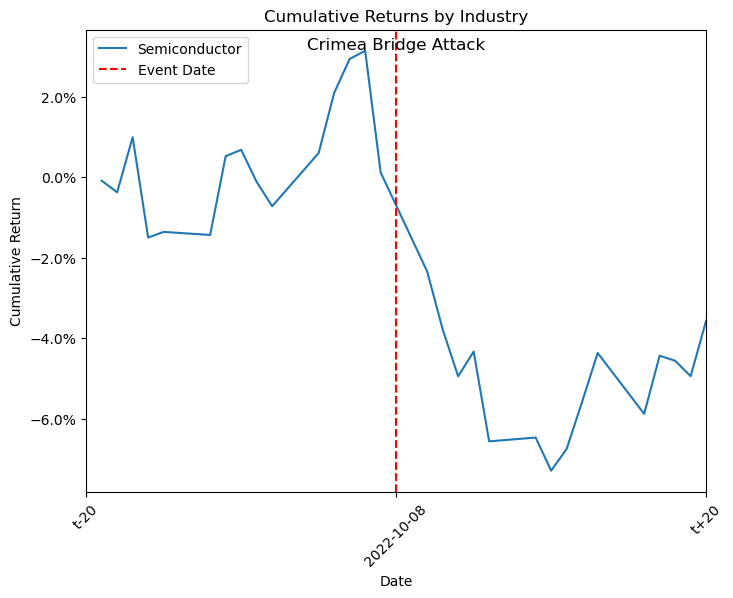

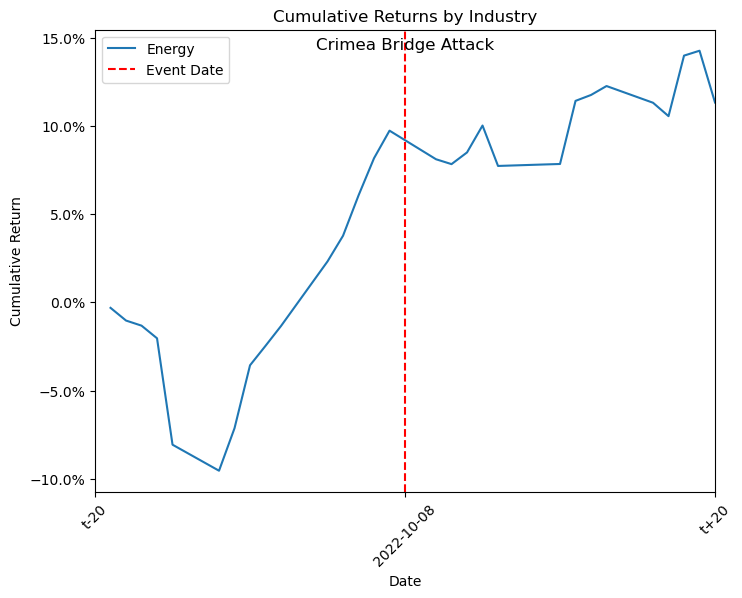

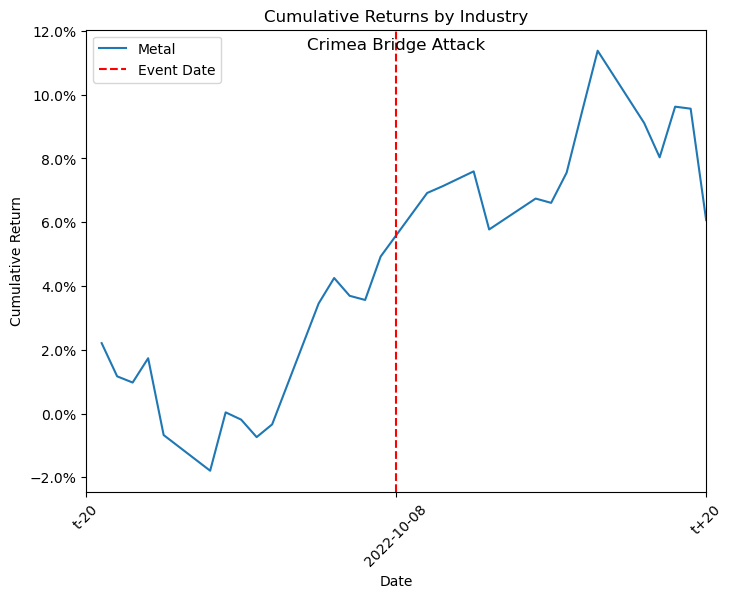

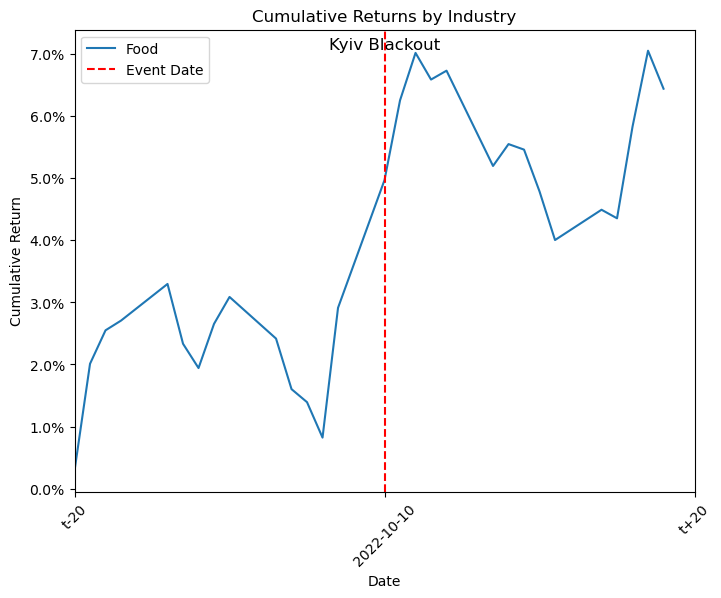

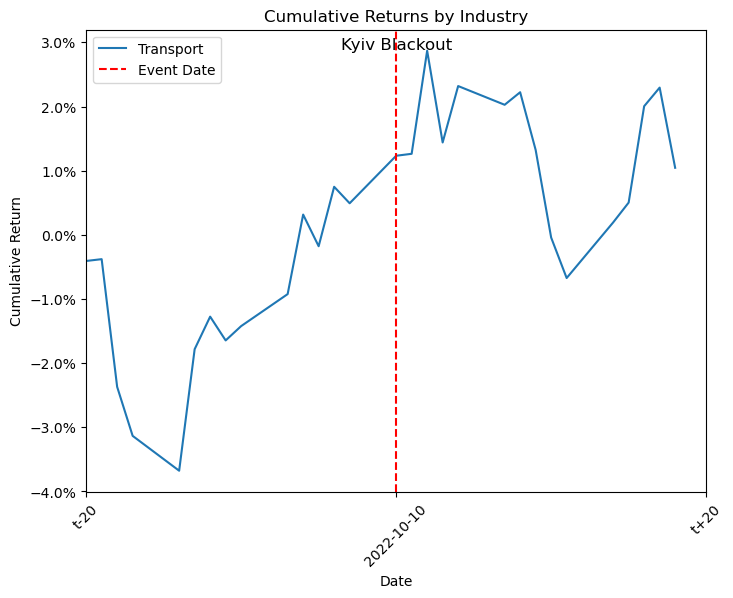

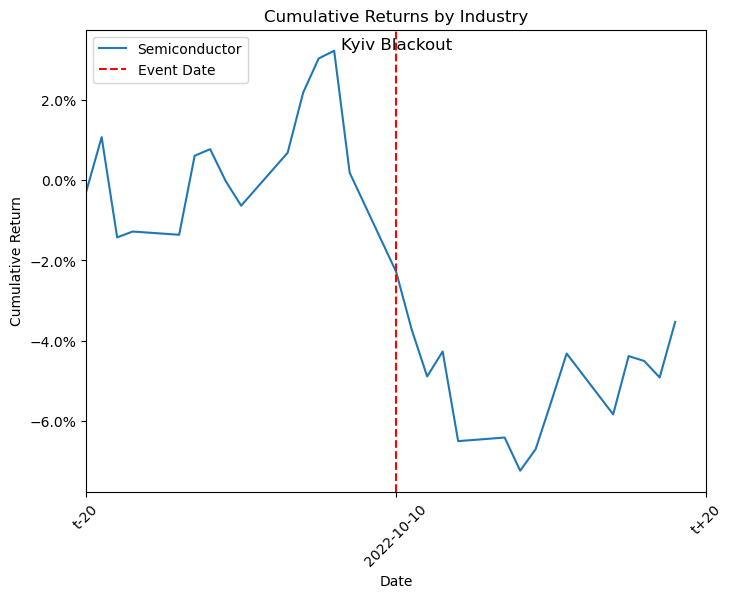

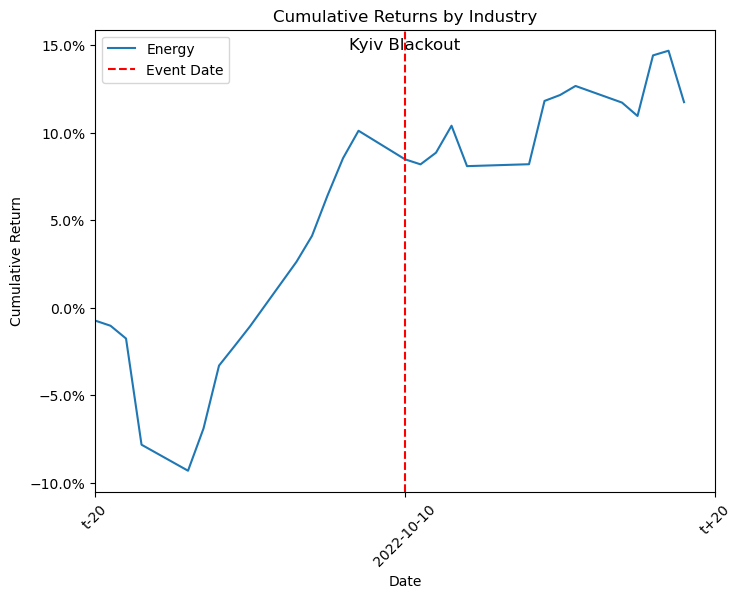

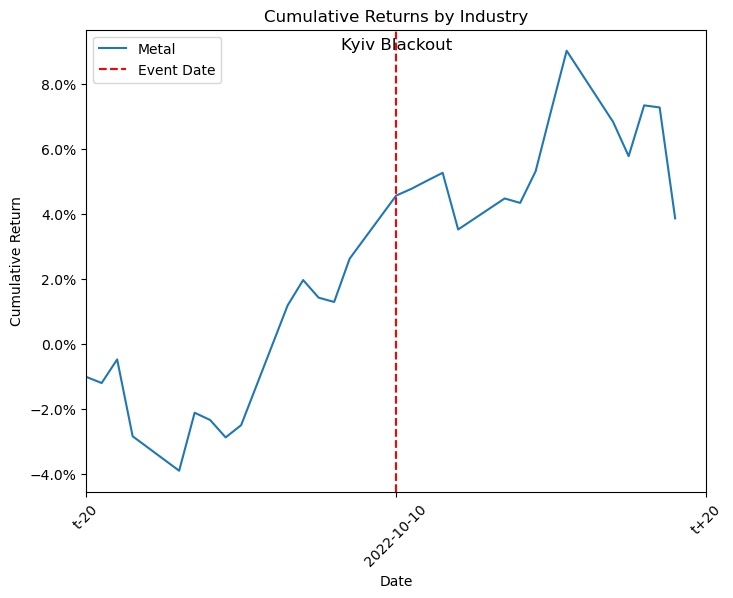

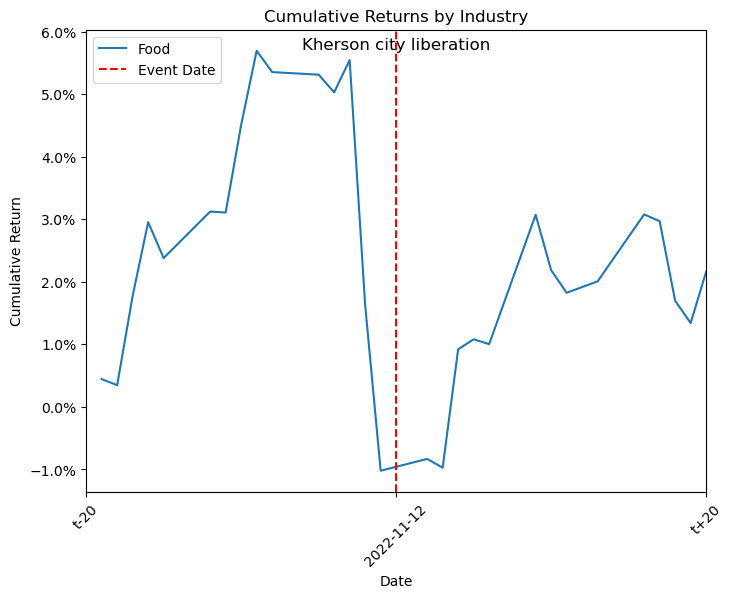

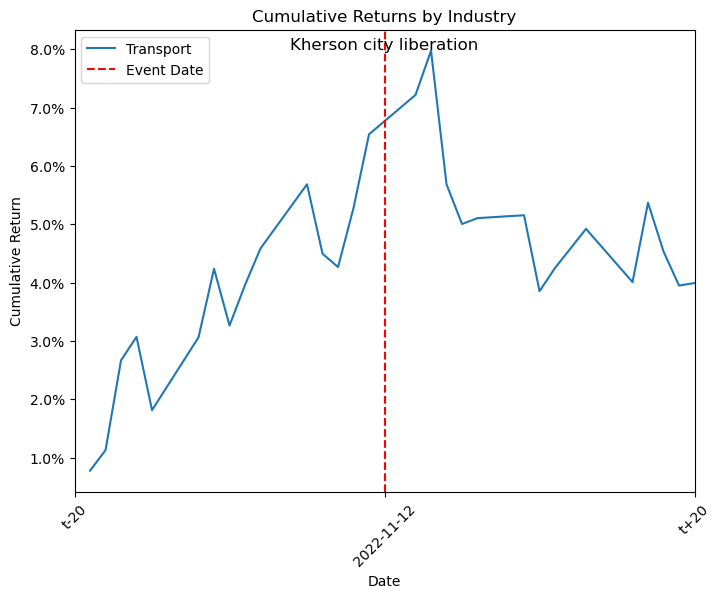

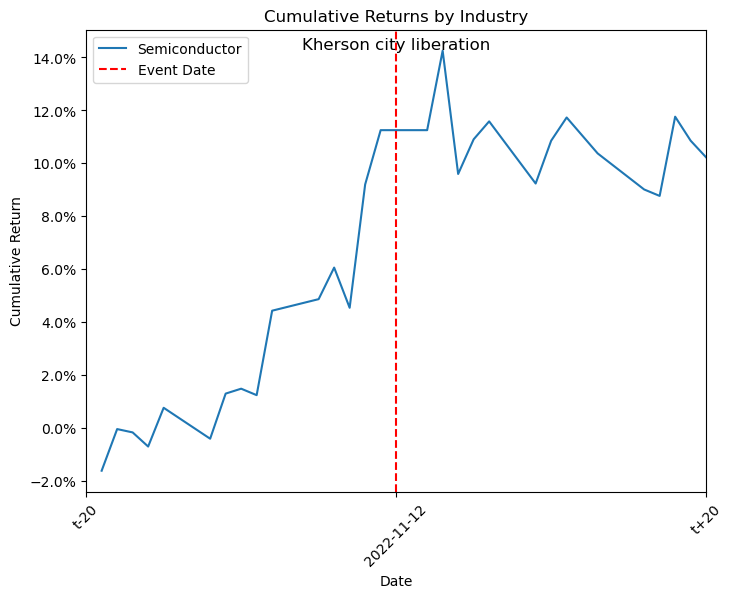

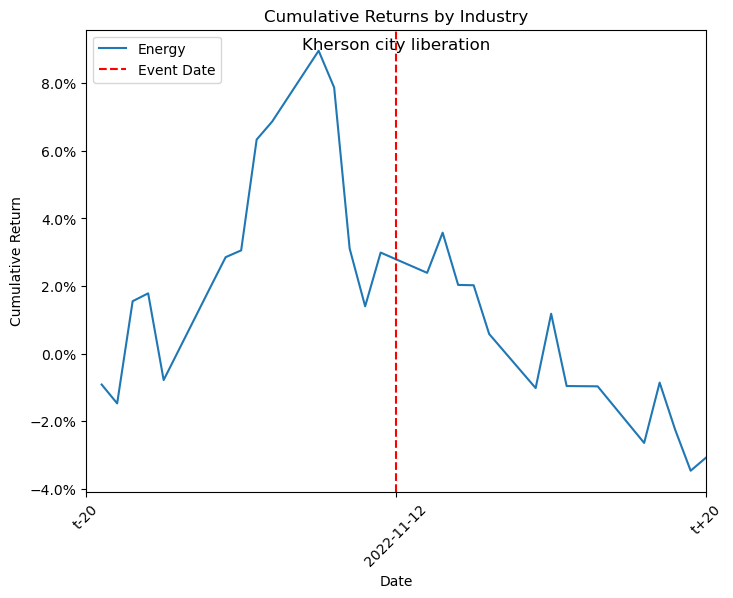

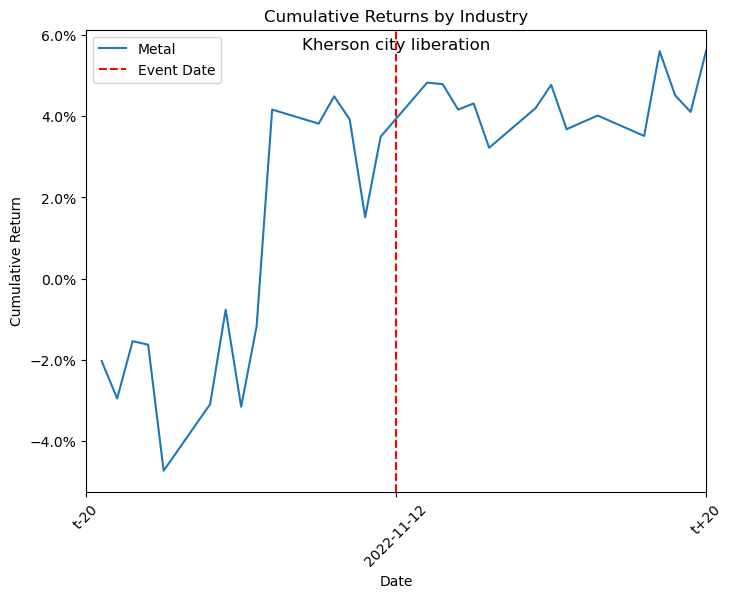

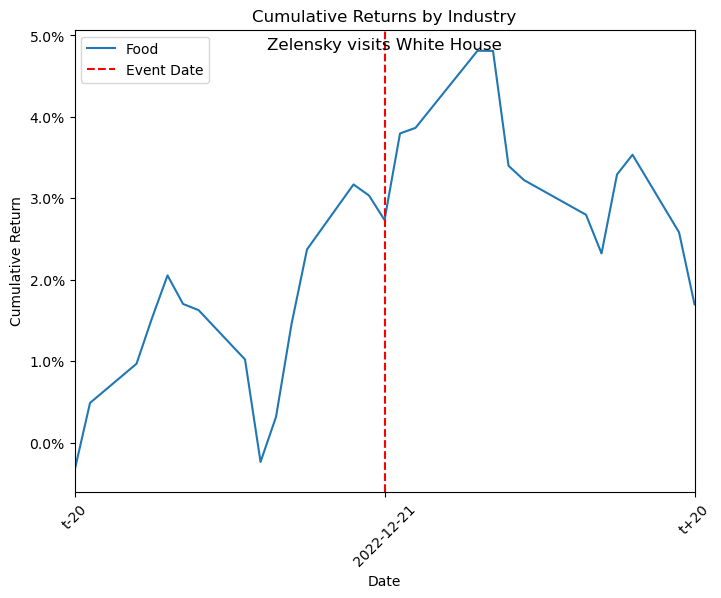

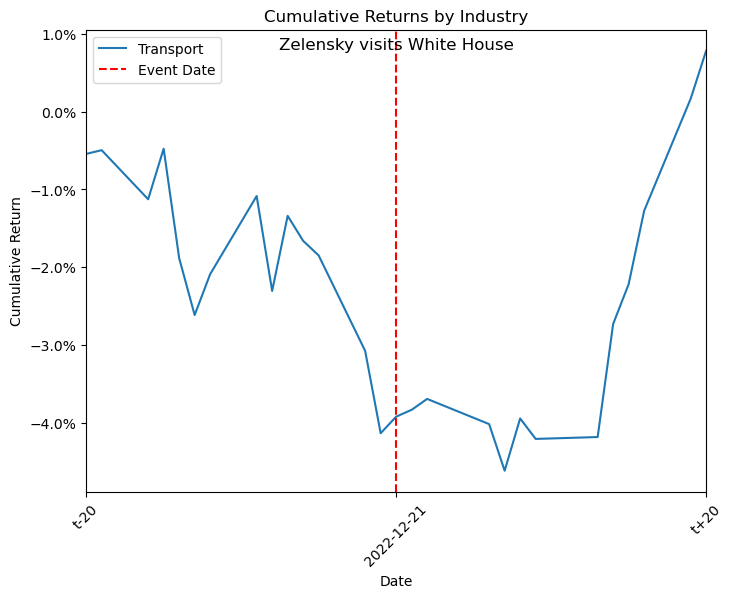

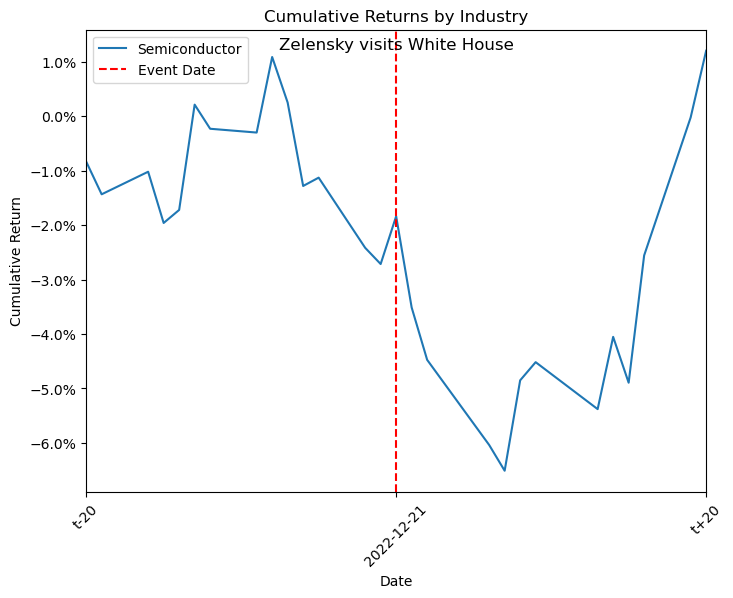

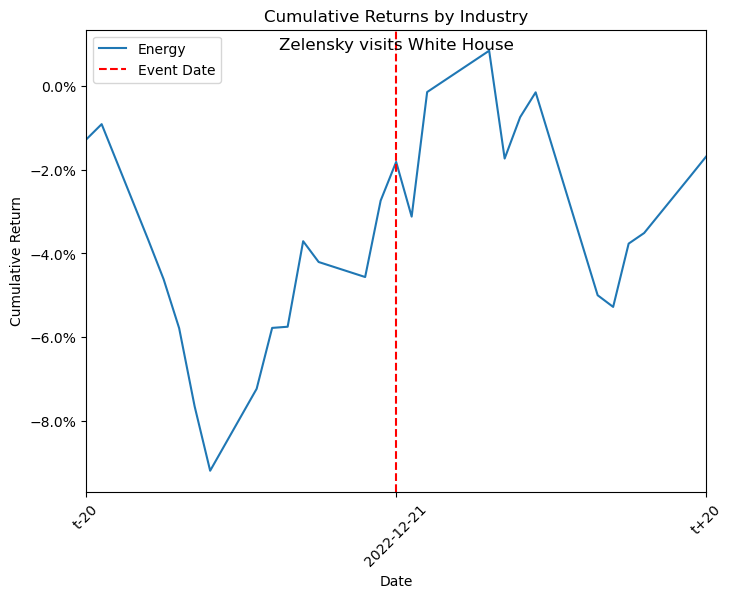

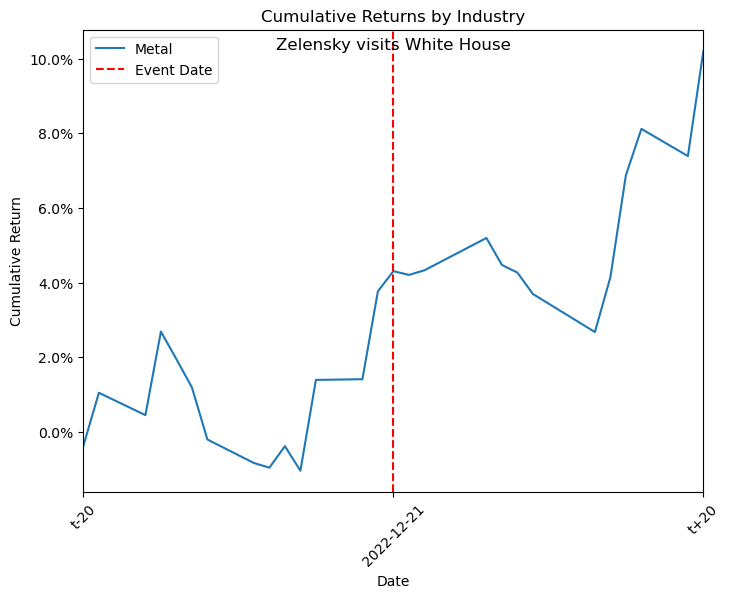

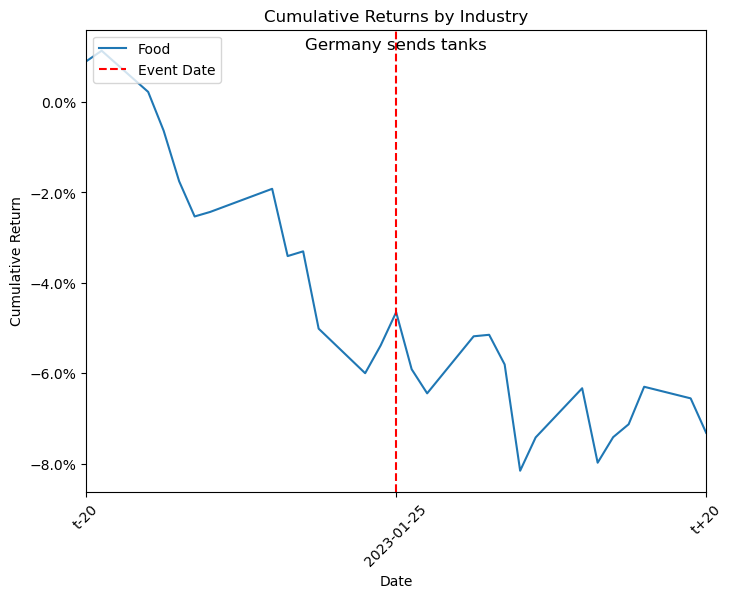

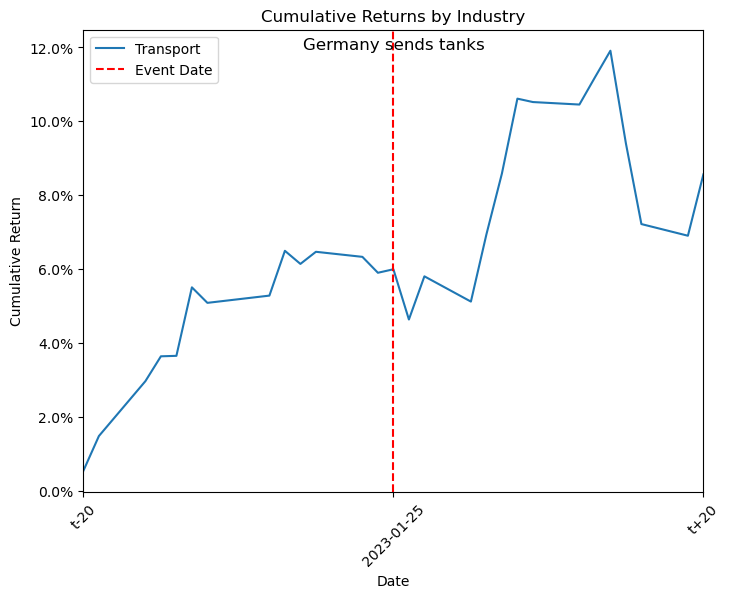

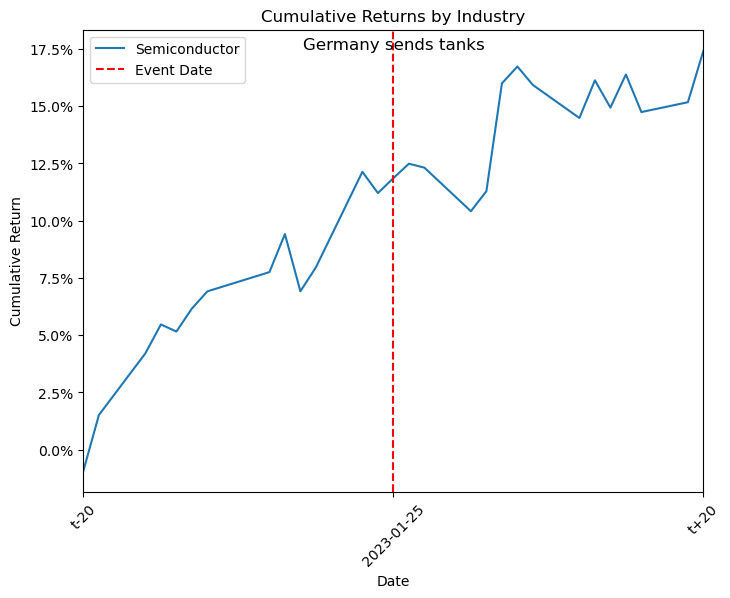

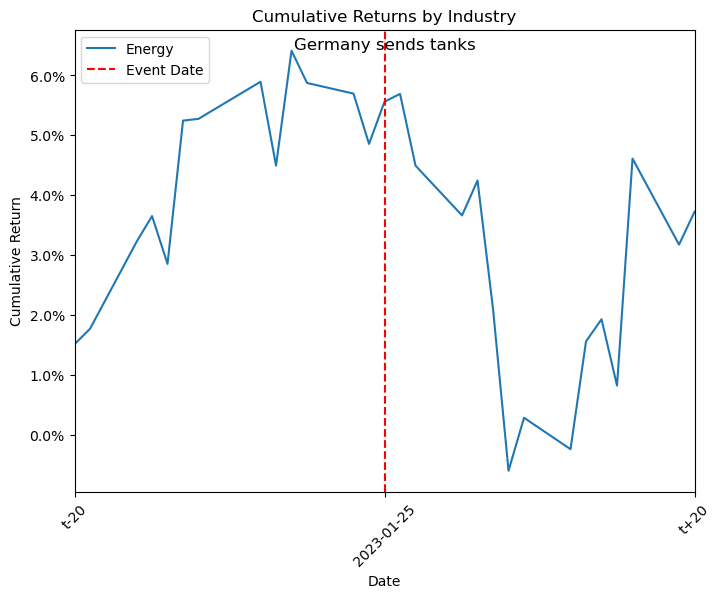

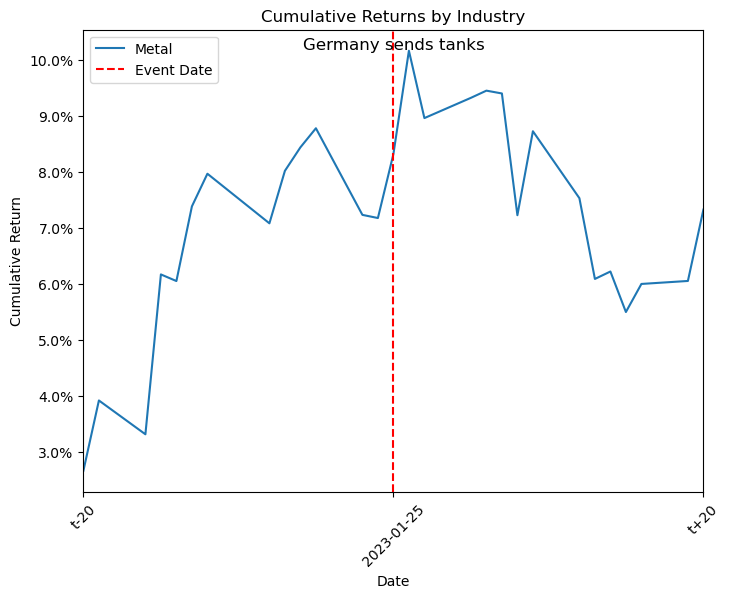

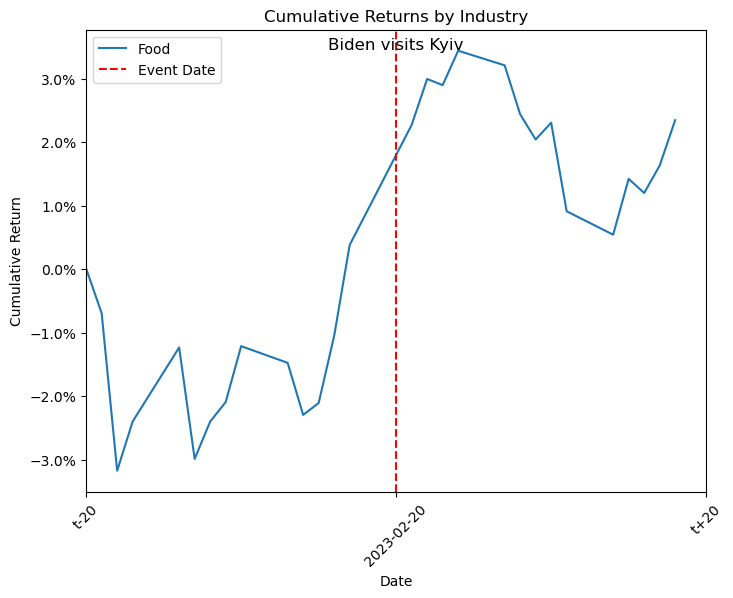

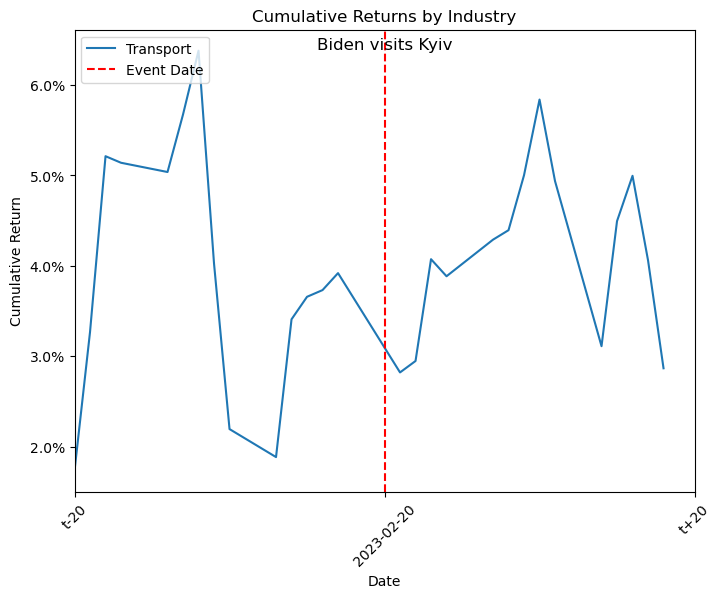

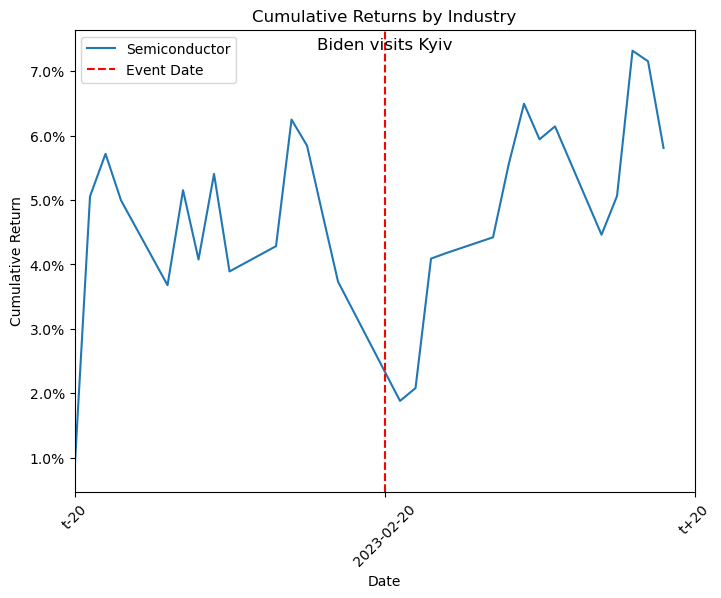

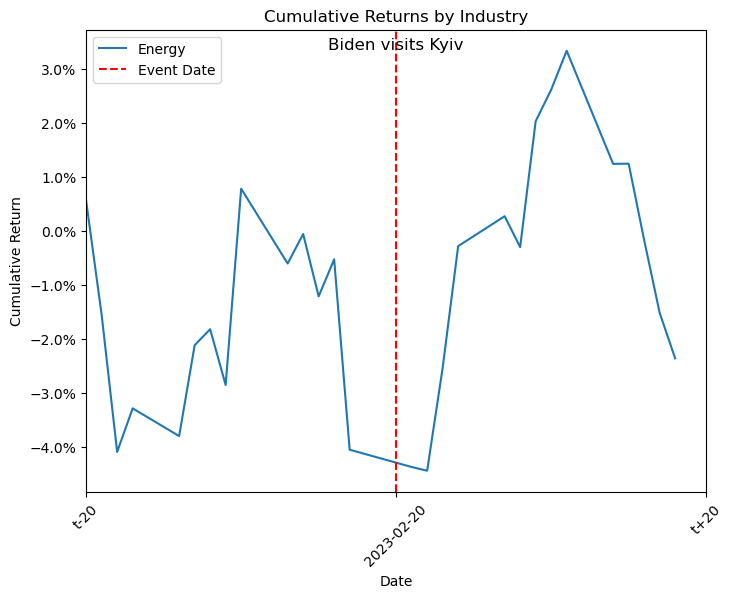

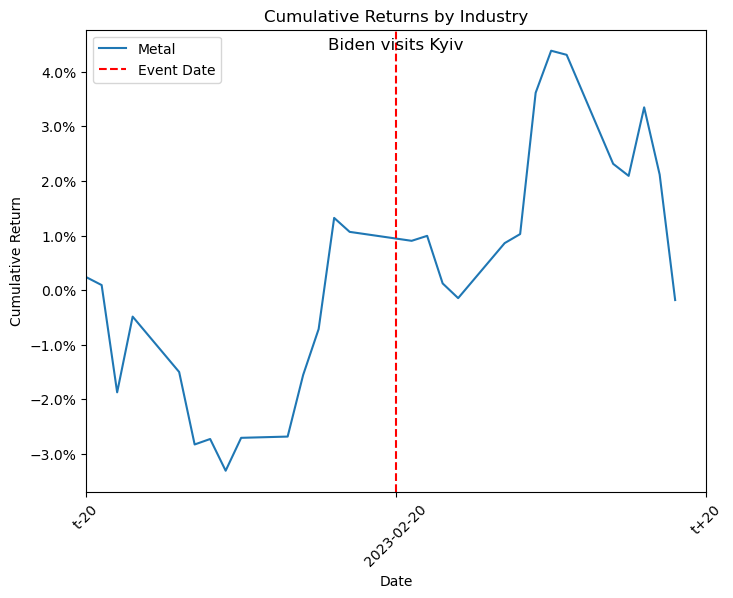

In [28]:
industries = ['Food', 'Transport', 'Semiconductor', 'Energy', 'Metal']
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']
    for industry in industries:
        sub_df = event_ret_df.query("Event == @event and Industry == @industry")
        
        plt.figure(figsize=(8, 6))
        
        sns.lineplot(x='Date', y='Cum_ret', data=sub_df, label = industry)
        
        plt.axvline(date, color='red', linestyle='--', label='Event Date')
        plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))
        
        xticks = [date - pd.Timedelta(days=20), date, date + pd.Timedelta(days=20)]
        xticklabels = ['t-20', date.strftime('%Y-%m-%d'), 't+20']
        plt.xticks(xticks, xticklabels)
        plt.xticks(rotation=45)
        
        plt.title('Cumulative Returns by Industry')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        
        ymin, ymax = plt.ylim()
        y_pos = ymax - (ymax - ymin) * 0.05

        # add text to plot
        plt.text(date, y_pos, event, fontsize=12,
                 ha='center', va='bottom')

        # move the legend to the bottom right corner
        plt.legend(loc='lower right')
        plt.legend(loc='upper left')

        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # format y-axis as percentages

        # show the plot
        plt.show()

## Calculating Return differences from event dates (t) to selected days after the event

### Getting Industry Returns at time t, t+3, t+10, and t+20

Date       Industry      ret0      ret3     ret10     ret20
0 2022-02-24           Food  0.029950  0.040155  0.051537 -0.005246
1 2022-02-24      Transport  0.054900  0.060587  0.019560  0.084081
2 2022-02-24  Semiconductor  0.086849  0.077957  0.009412  0.049730
3 2022-02-24         Energy  0.070428  0.097229  0.248682  0.146538
4 2022-02-24          Metal  0.058599  0.105121  0.186497  0.181921

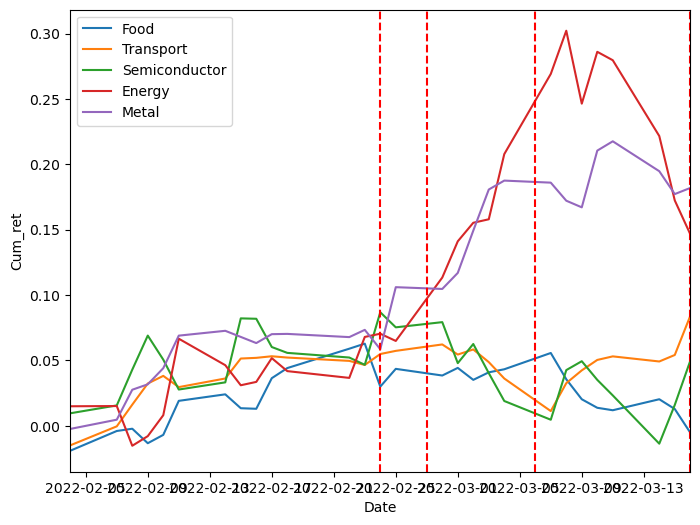

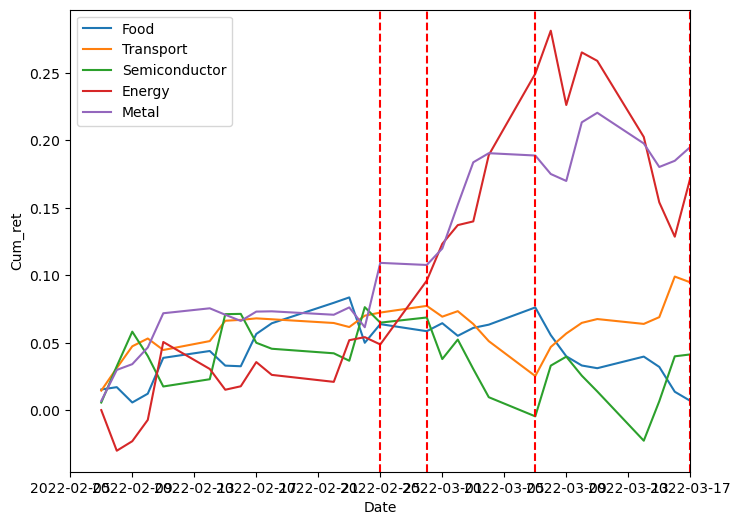

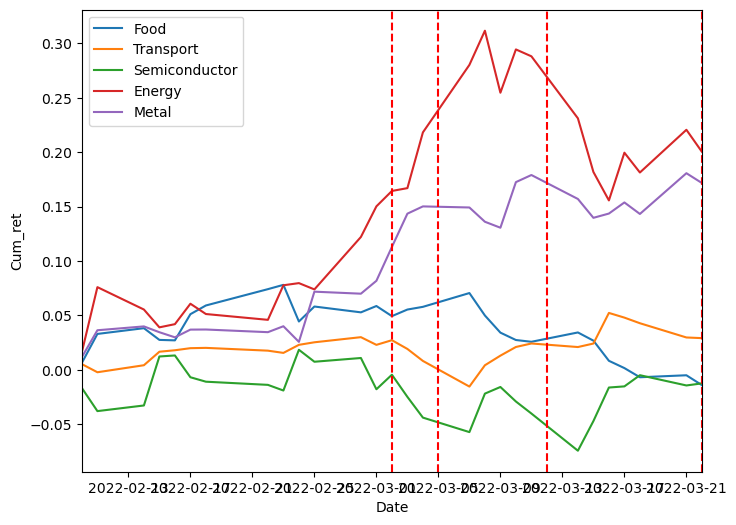

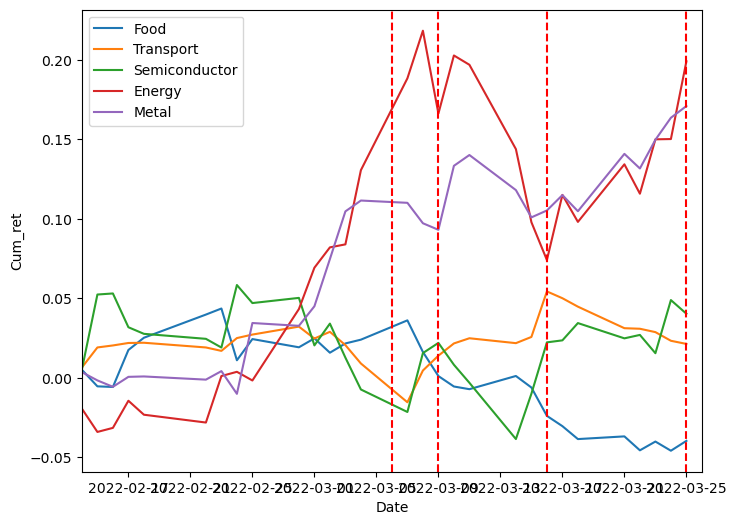

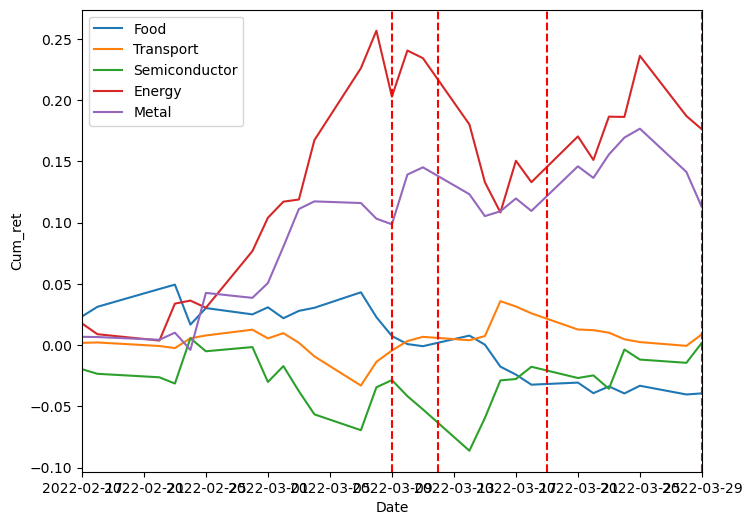

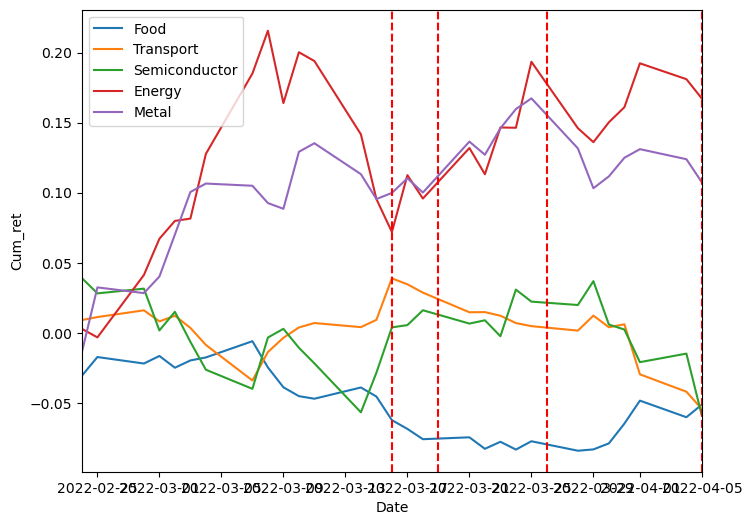

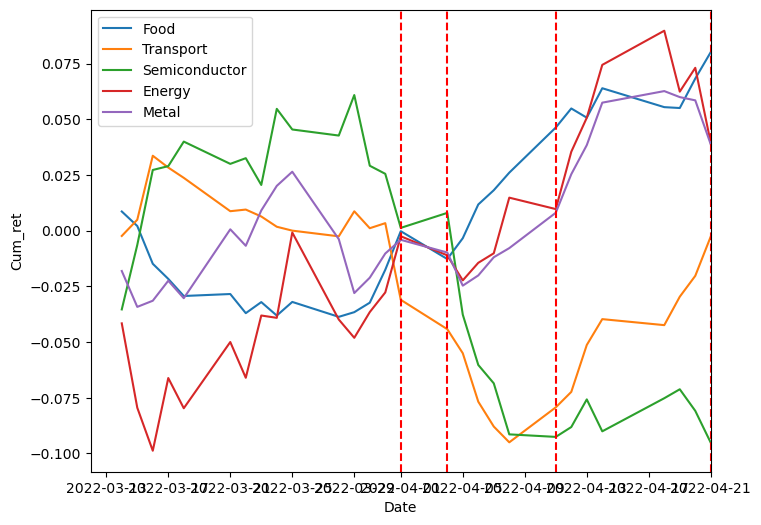

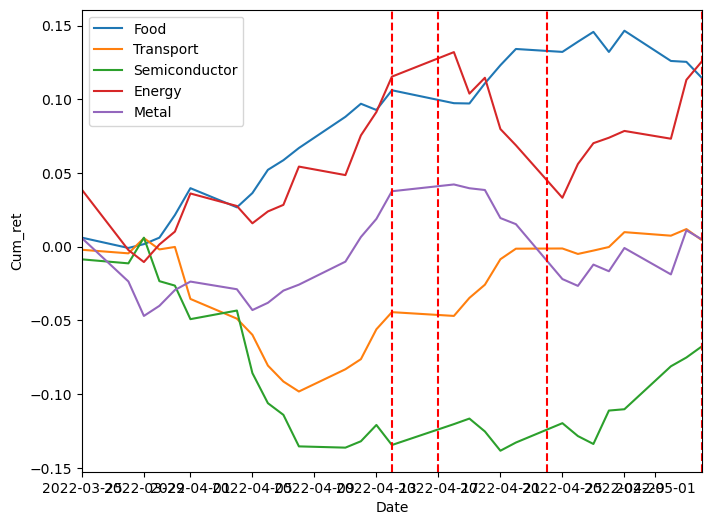

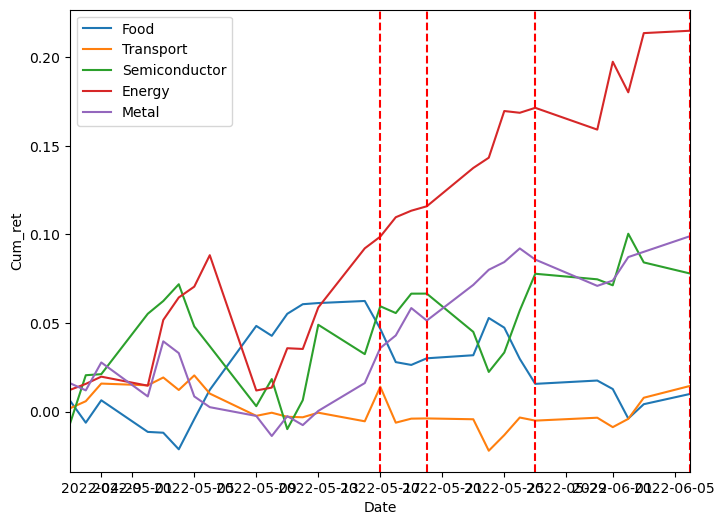

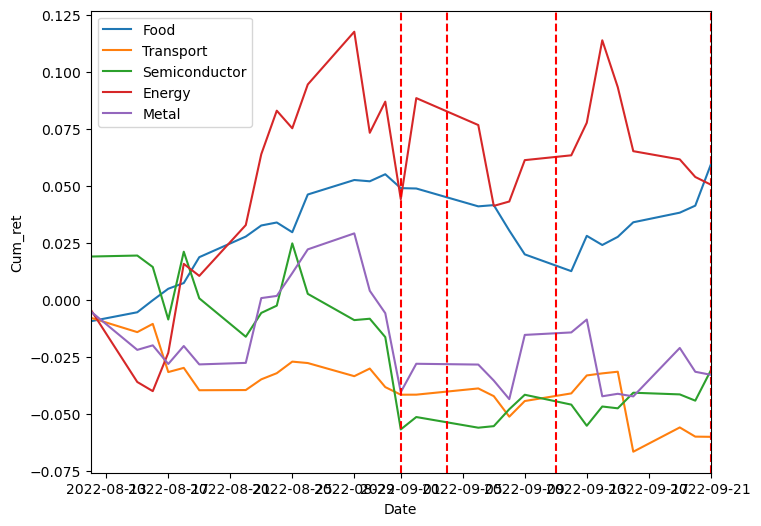

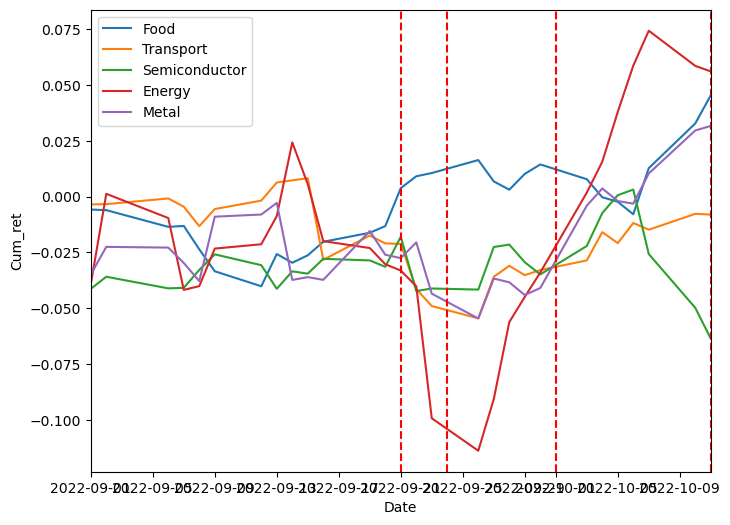

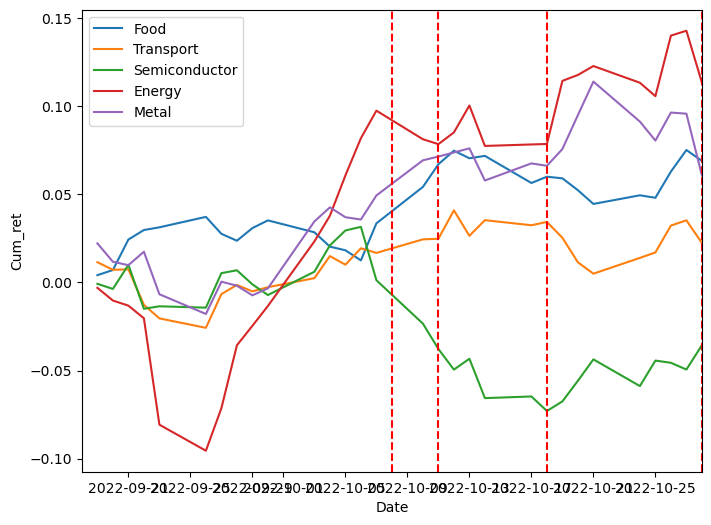

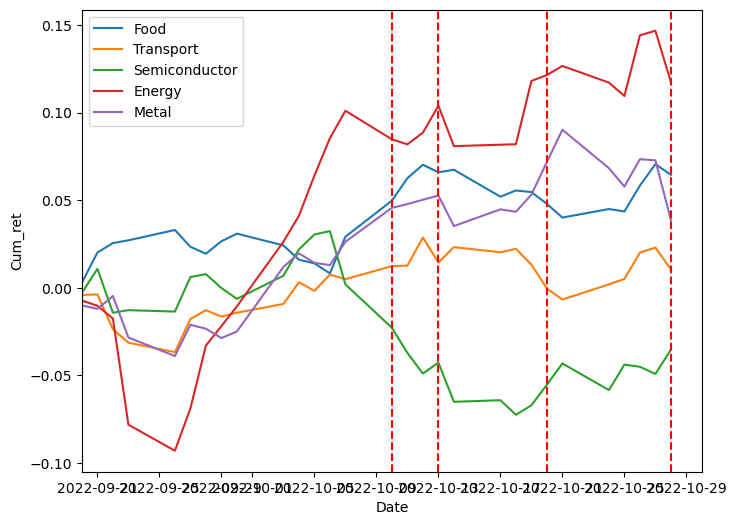

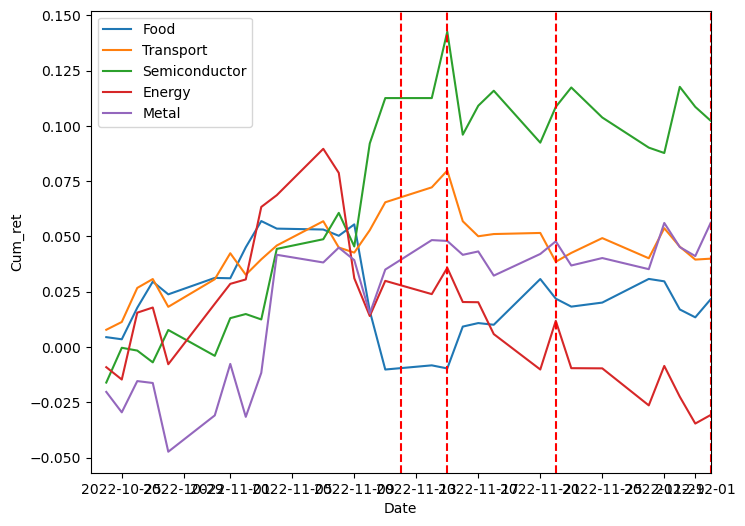

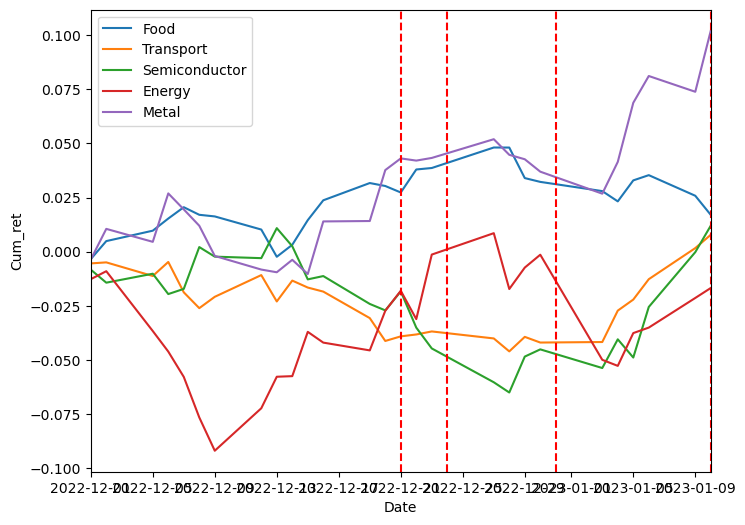

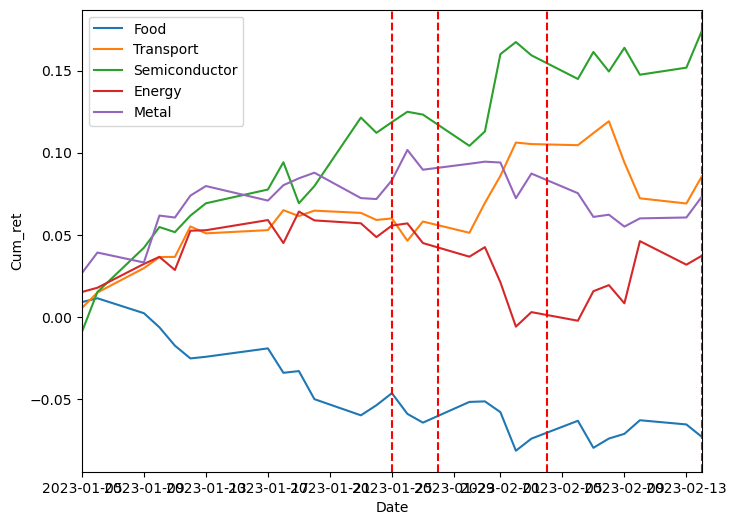

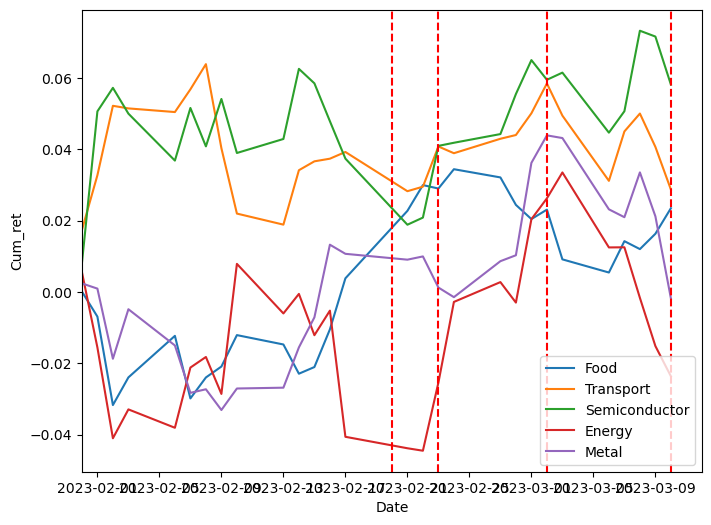

In [29]:
results = []
industries = ['Food', 'Transport', 'Semiconductor', 'Energy', 'Metal']
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']

    sub_df = event_ret_df.query("Event == @event")
    sub_df['Date'] = pd.to_datetime(sub_df['Date'])
    last_date = sub_df['Date'].max()
    date1 = date + pd.Timedelta(days=3)
    date2 = date + pd.Timedelta(days=10)
    date3 = min(date + pd.Timedelta(days=20), last_date)
    
    plt.figure(figsize=(8, 6))
    for industry in industries:
        industry_df = sub_df[sub_df['Industry'] == industry]
        sns.lineplot(x='Date', y='Cum_ret', data=industry_df, label=industry)
    
    plt.axvline(date, color='red', linestyle='--', label='Event Date')
    plt.axvline(date1, color='red', linestyle='--', label='Event Date + 3')
    plt.axvline(date2, color='red', linestyle='--', label='Event Date + 10')
    plt.axvline(date3, color='red', linestyle='--', label='Event Date + 20')
    plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))
    
    for line in plt.gca().lines:
        if line.get_label() in industries: 
            x = mpl_dates.date2num(date)
            x1 = mpl_dates.date2num(date1)
            x2 = mpl_dates.date2num(date2)
            x3 = mpl_dates.date2num(date3)
            y = np.interp(x, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
            y1 = np.interp(x1, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
            y2 = np.interp(x2, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
            y3 = np.interp(x3, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
            result = {"Date": date, "Industry": line.get_label(), 'ret0': y, "ret3": y1, "ret10": y2, "ret20": y3}
            results.append(result)

results_df = pd.DataFrame(results)
results_df.head(5)

### Calculating return differences from t to t+3, t+10, and t+20

In [30]:
results_df["retDiff3"] = results_df["ret3"] - results_df["ret0"]
results_df["retDiff10"] = results_df["ret10"] - results_df["ret0"]
results_df["retDiff20"] = results_df["ret20"] - results_df["ret0"]
results_df = results_df.drop(['ret3', 'ret10', 'ret20', 'ret0'], axis=1)
results_df.rename(columns = {"retDiff3": "ret3", "retDiff10": "ret10", "retDiff20": "ret20"}, inplace = True)
results_df.to_csv("OutputData/RetDiff.csv")
results_df

Date       Industry      ret3     ret10     ret20
0  2022-02-24           Food  0.010206  0.021588 -0.035195
1  2022-02-24      Transport  0.005687 -0.035341  0.029181
2  2022-02-24  Semiconductor -0.008892 -0.077437 -0.037119
3  2022-02-24         Energy  0.026801  0.178254  0.076110
4  2022-02-24          Metal  0.046522  0.127898  0.123322
..        ...            ...       ...       ...       ...
80 2023-02-20           Food  0.010980  0.005069  0.005472
81 2023-02-20      Transport  0.009781  0.027443 -0.002288
82 2023-02-20  Semiconductor  0.017459  0.035970  0.034629
83 2023-02-20         Energy  0.017586  0.069210  0.019357
84 2023-02-20          Metal -0.008213  0.034412 -0.011262

[85 rows x 5 columns]